---
BootCamp Machine Learning em Projetos
---
**Suspeitos por tempo de permanência na fronteira**

*Professores: Erick Muzart e Fernando Melo e Fernando Melo*

Turma 2024 - Alunos:
- Roberto Carlos Bordin
- Thiago dos Santos Hendler
- Wallinson Oliveira Schutte

# Descrição das variáveis

| Nome da variável | Descrião
|---|---|
|placa|Dado sensível|
|tempofronteira|Tempo de permanência na fronteira (horas)|
|anomodelo|Ano do modelo do veículo|
|categoria|Categoria do veículo|
|cor|Cor do veículo|
|dataemissaocrv|Data da emissão da CRV - Documento do veículo|
|tipodocumentoproprietario|Tipo do documento do proprietário do veículo|
|marca|Marca do veículo|
|modelo|Modelo do veículo|
|municipioemplacamento|Município de emplacamento do veículo|
|ufemplacamento|UF de emplacamento do veículo|
|tipo|Tipo do veículo|
|consulta|Informações oriundas das consultas feitas do veículo no sistema feitas a qualquer momento|
|situacao|Variável target: 1 (ilícito), 0 (lícito)|

# Glossário

**Métricas para avaliar o modelo:**
- R² (Coeficiente de Determinação): métrica que indica a proporção da variância dos dados que é explicada por um modelo de regressão. Ele varia entre 0 e 1. R² igual a 1 indica que o modelo explica perfeitamente a variabilidade dos dados. R² igual a 0 indica que o modelo não explica nenhuma variabilidade dos dados.
- F1-Score: é uma métrica usada principalmente em problemas de classificação binária (como em algoritmos de machine learning), que combina a Precisão e a Revocação (ou Recall) em uma única métrica. É a média harmônica entre a Precisão e a Revocação. Precisão (Precision): Proporção de verdadeiros positivos entre todos os exemplos que o modelo classificou como positivos.
Revocação (Recall): Proporção de verdadeiros positivos entre todos os exemplos que realmente são positivos. O F1-Score é útil quando há um desequilíbrio entre as classes, ou seja, quando uma classe é mais frequente que a outra. Um F1-Score de 1 é o ideal, enquanto um valor de 0 significa que o modelo falhou completamente.
- T-Student (Teste t de Student): O teste t de Student é uma técnica estatística usada para determinar se há uma diferença significativa entre as médias de dois grupos (ou entre uma amostra e um valor fixo). O valor do t é comparado com uma distribuição t para determinar se a diferença entre as médias é significativa. Se o valor do t for suficientemente grande (dependendo do nível de significância), rejeitamos a hipótese nula, ou seja, assumimos que existe uma diferença significativa entre os grupos.
- P-valor (Valor P): é uma métrica estatística que indica a probabilidade de os resultados observados serem obtidos sob a hipótese nula. Ele ajuda a decidir se devemos ou não rejeitar a hipótese nula.
Interpretação:
p<α (geralmente 𝛼=0.05): Rejeitamos a hipótese nula, sugerindo que os resultados observados são significativos.
p≥α: Não rejeitamos a hipótese nula, ou seja, os resultados não são significativos o suficiente para rejeitar a hipótese de que o efeito observado ocorreu por acaso.
Ligação com o teste t: No teste t, o p-valor é a probabilidade de observar um valor de t tão extremo (ou mais) quanto o que foi observado, assumindo que a hipótese nula é verdadeira.
- Precisão (Precision)/VPP: Proporção de verdadeiros positivos entre todos os exemplos que o modelo classificou como positivos.
- Revocação (Recall)/Sensibilidade: Proporção de verdadeiros positivos entre todos os exemplos que realmente são positivos.
(NASSAR, 2012).

**Tipos de Correlação:**
- Pearson: É o método padrão. Mede a correlação linear entre duas variáveis. A relação deve ser linear para que a correlação seja significativa.
- Kendall: Mede a correlação ordinal. Avalia a relação entre duas variáveis com base em suas classificações. É mais robusto a outliers.
- Spearman: Também mede a correlação ordinal. Avalia a relação entre duas variáveis com base na classificação dos dados. Semelhante ao Kendall, é menos sensível a outliers.

# Códigos

## Carregar Bibliotecas

In [1]:
## Bibliotecas e Funções

#!pip install xgboost
#!pip install lightgbm
#!pip install catboost

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report, mean_squared_error, r2_score
#from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.inspection import permutation_importance

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  OneHotEncoder

from sklearn.metrics import ConfusionMatrixDisplay

# Normalização de dados
from sklearn.preprocessing import StandardScaler

# Algoritmos de aprendizagem
import logging
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

#Redes Neurais
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.copy_on_write = True # Allow re-write on variable
warnings.filterwarnings("ignore", category=UserWarning) # Ignore warning
warnings.filterwarnings("ignore", category=FutureWarning) # Ignore warning
warnings.filterwarnings("ignore", category=UserWarning) # Ignore warning
warnings.filterwarnings("ignore", category=RuntimeWarning) # Ignore warning
warnings.filterwarnings("ignore", category=DeprecationWarning) # Ignore warning
#sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Carregar Dados

In [2]:
## Carregar Dados

#!pip install openpyxl
#!pip install gdown
from google.colab import files
from google.colab import drive
#drive.mount('/content/drive')
import gdown

# ID do arquivo Google Drive
file_id = '1rFf4n9m4eJCUhkjde5di5jrTEkrR22VT'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'arquivo.csv'
gdown.download(url, output, quiet=False)
#dados = pd.read_csv(output)
dados = pd.read_csv(output, encoding='latin-1')

#dados = dados.drop(columns=['Date'])
dados.info()

Downloading...
From: https://drive.google.com/uc?id=1rFf4n9m4eJCUhkjde5di5jrTEkrR22VT
To: /content/arquivo.csv
100%|██████████| 141k/141k [00:00<00:00, 51.8MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   placa                               746 non-null    object 
 1   h_perm_front                        746 non-null    float64
 2   anoModelo                           745 non-null    float64
 3   categoria                           745 non-null    object 
 4   cor                                 745 non-null    object 
 5   dataEmissaoCrv                      745 non-null    float64
 6   descricaoTipoDocumentoProprietario  745 non-null    object 
 7   marcaModelo                         745 non-null    object 
 8   municipioEmplacamento               745 non-null    object 
 9   tipo                                745 non-null    object 
 10  ufEmplacamento                      745 non-null    object 
 11  descricao                           746 non-n

## Análise exploratória dos dados 1

In [ ]:
df = dados.copy()

# Exibir coluna nulas
df.isnull().sum()

print(df.head())

       placa  h_perm_front  anoModelo   categoria       cor  dataEmissaoCrv  \
0  veiculo01         2.227     2021.0     ALUGUEL      AZUL    1.631070e+12   
1  veiculo02         1.723     2008.0  PARTICULAR  VERMELHA    1.712286e+12   
2  veiculo03        22.702     2005.0  PARTICULAR     PRATA    1.517969e+12   
3  veiculo04        13.781     2015.0     ALUGUEL    BRANCA    1.417054e+12   
4  veiculo05         4.937     2016.0     ALUGUEL    BRANCA    1.452737e+12   

  descricaoTipoDocumentoProprietario               marcaModelo  \
0                               CNPJ          SCANIA/R450 A6X2   
1                                CPF          GM/CELTA 2P LIFE   
2                                CPF          GM/CELTA 4P LIFE   
3                               CNPJ  SCANIA/MPOLO PARADISO DD   
4                               CNPJ   VOLVO/MPOLO PARADISO LD   

  municipioEmplacamento             tipo ufEmplacamento  \
0         FOZ DO IGUACU  CAMINHAO TRATOR             PR   
1         

## Tratamento dos Dados

In [3]:
df = dados.copy()

# Remover linhas com dados nulos
df = df.dropna()

df.rename(columns={'h_perm_front': 'tempofronteira',
                   'anoModelo': 'anomodelo',
                   'dataEmissaoCrv': 'dataemissaocrv',
                   'descricaoTipoDocumentoProprietario': 'tipodocumentoproprietario',
                   'municipioEmplacamento': 'municipioemplacamento',
                   'ufEmplacamento': 'ufemplacamento',
                   'descricao': 'consulta_res',
                   'ilicito': 'target'
                   }, inplace=True)

df[['marca', 'modelo']] = df['marcaModelo'].str.split('/', expand=True)

# Converter para data
df['dataemissaocrv'] = pd.to_datetime(df['dataemissaocrv'], unit='ms')

#Adicionar essa coluna gera uma colinariedade com a coluna dataemissaocrv
#fixed_date = pd.to_datetime('2024-10-16')
#df['tempocrv'] = (fixed_date - df['dataemissaocrv']).dt.days

df['dataemissaocrv'] = df['dataemissaocrv'].dt.year

df['anomodelo'] = df['anomodelo'].astype(int)

df['unicodono'] = df['dataemissaocrv'] <= df['anomodelo']

df['tempofronteira'] = df['tempofronteira'].astype(int)
df['anomodelo'] = df['anomodelo'].astype(int)
df['dataemissaocrv'] = df['dataemissaocrv'].astype(int)

# Coluna consulta - substituir valores por RES1, RES2, etc
valores_unicos = df['consulta_res'].unique()
codigo_dict = {valor: f'RES{i+1}' for i, valor in enumerate(valores_unicos)}
df['consulta_res'] = df['consulta_res'].map(codigo_dict)

for chave, valor in codigo_dict.items():
    print(f"{valor}: {chave}")

# Apagar colunas não utlizadas mais
df = df.drop('placa', axis=1)
df = df.drop('marcaModelo', axis=1)
#df = df.drop('consulta', axis=1)
#df = df.drop('cor', axis=1)

# Coluna cor - substituir as cores por números de acordo com a intensidade da cor,
              # onde BRANCA = 10 e PRETA = 0
"""
peso_cor = {'AMARELA': 4,'AZUL': 3,'BEGE': 3,'BRANCA': 10,'CINZA': 5,
            'DOURADA': 6,'FANTASIA': 2,'MARROM': 2,'PRATA': 8,'PRETA': 0,
            'VERDE': 5,'VERMELHA': 4,
}
"""
#df['cor'] = df['cor'].map(peso_cor)
#df_pesos = pd.DataFrame(list(peso_cor.items()), columns=['Cor', 'Peso'])
#print("Tabela com pesos atribuídos:")
#print(df)
#print("\nTabela de cores e pesos:")
#print(df_pesos)


#print("")
#print(df.info())
#print(df.head())

RES1: Não há restrições para este veículo no DENATRAN BASE 24h/7d.
RES2: Veículo com restrição judicial no sistema DENATRAN BASE 24h/7d!
RES3: Veículo com restrição na Receita Federal no sistema DENATRAN BASE 24h/7d!
RES4: Veículo comunicação de venda no sistema DENATRAN BASE 24h/7d!
RES5: Veículo com indicador de Recall ativo no sistema DENATRAN BASE 24h/7d!
RES6: Veículo com registro de Roubo/Furto no sistema DENATRAN BASE 24h/7d!


"\npeso_cor = {'AMARELA': 4,'AZUL': 3,'BEGE': 3,'BRANCA': 10,'CINZA': 5,\n            'DOURADA': 6,'FANTASIA': 2,'MARROM': 2,'PRATA': 8,'PRETA': 0,\n            'VERDE': 5,'VERMELHA': 4,\n}\n"

## Análise exploratória dos Dados 2


In [10]:
print(df[['anomodelo', 'dataemissaocrv','unicodono','tempocrv']])
#df.info()

##fazer um if

     anomodelo  dataemissaocrv  unicodono  tempocrv
0         2021            2021       True      1133
1         2008            2024      False       193
2         2005            2018      False      2442
3         2015            2014       True      3610
4         2016            2016       True      3197
..         ...             ...        ...       ...
741       2023            2023       True       462
742       2005            2013      False      4114
743       2024            2024       True        95
744       2010            2024      False        47
745       2018            2023      False       384

[745 rows x 4 columns]


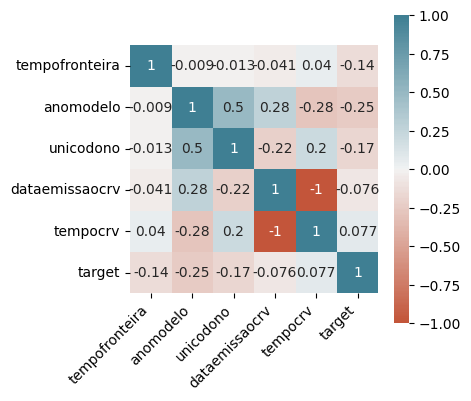

In [13]:
## Depois procurar os outliers

## Análise de correlação entre o tempo de permanência na fronteira e o target.

correl = pd.DataFrame(df[['tempofronteira','anomodelo','unicodono','dataemissaocrv','tempocrv','target']])

correl = correl.corr(method='pearson')
correl = round(correl,3)
#print(correl)

fig, ax = plt.subplots(figsize = (4,4))

ax = sns.heatmap(
    correl,
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200,),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [23]:
X_train

,tempofronteira,anomodelo,dataemissaocrv,unicodono,categoria_ALUGUEL,categoria_OFICIAL,categoria_PARTICULAR,cor_AMARELA,cor_AZUL,cor_BEGE,cor_BRANCA,cor_CINZA,cor_DOURADA,cor_FANTASIA,cor_MARROM,cor_PRATA,cor_PRETA,cor_VERDE,cor_VERMELHA,tipodocumentoproprietario_CNPJ,tipodocumentoproprietario_CPF,tipo_AUTOMOVEL,tipo_CAMINHAO,tipo_CAMINHAO TRATOR,tipo_CAMINHONETE,tipo_CAMIONETA,tipo_MICROONIBUS,tipo_MOTOCICLETA,tipo_ONIBUS,tipo_SEMI-REBOQUE,tipo_UTILITARIO,municipioemplacamento_ABADIA DOS DOURADOS,municipioemplacamento_ADAMANTINA,municipioemplacamento_ALECRIM,municipioemplacamento_ALTO PARANA,municipioemplacamento_ALTONIA,municipioemplacamento_ANAURILANDIA,municipioemplacamento_APUCARANA,municipioemplacamento_ARACAJU,municipioemplacamento_ARAPONGAS,municipioemplacamento_ARAQUARI,municipioemplacamento_ARARUNA,municipioemplacamento_ARAXA,municipioemplacamento_ASSIS CHATEAUBRIAND,municipioemplacamento_ASTORGA,municipioemplacamento_AVARE,municipioemplacamento_BALNEARIO CAMBORIU,municipioemplacamento_BANDEIRANTES,municipioemplacamento_BARUERI,municipioemplacamento_BAURU,municipioemplacamento_BELO HORIZONTE,municipioemplacamento_BENTO GONCALVES,municipioemplacamento_BIRIGUI,municipioemplacamento_BLUMENAU,municipioemplacamento_BRAGANEY,municipioemplacamento_BRASILIA,municipioemplacamento_BRUSQUE,municipioemplacamento_CAARAPO,municipioemplacamento_CABO FRIO,municipioemplacamento_CAFELANDIA,municipioemplacamento_CAMBE,municipioemplacamento_CAMBUI,municipioemplacamento_CAMPINA DA LAGOA,municipioemplacamento_CAMPINA DAS MISSOES,municipioemplacamento_CAMPINAS,municipioemplacamento_CAMPO GRANDE,municipioemplacamento_CAMPO MOURAO,municipioemplacamento_CANOAS,municipioemplacamento_CANTAGALO,municipioemplacamento_CARAPICUIBA,municipioemplacamento_CARLOS BARBOSA,municipioemplacamento_CASCAVEL,municipioemplacamento_CASTRO,municipioemplacamento_CATUIPE,municipioemplacamento_CAXIAS DO SUL,municipioemplacamento_CEDRAL,municipioemplacamento_CHAPECO,municipioemplacamento_CIANORTE,municipioemplacamento_COCALZINHO DE GOIAS,municipioemplacamento_COLOMBO,municipioemplacamento_COLORADO,municipioemplacamento_CONSELHEIRO LAFAIETE,municipioemplacamento_CORBELIA,municipioemplacamento_CORONEL DOMINGOS SOARES,municipioemplacamento_CORONEL VIVIDA,municipioemplacamento_COSMOPOLIS,municipioemplacamento_CRICIUMA,municipioemplacamento_CRUZ ALTA,municipioemplacamento_CRUZEIRO DO OESTE,municipioemplacamento_CURITIBA,municipioemplacamento_CURVELO,municipioemplacamento_DELFINOPOLIS,municipioemplacamento_DIONISIO CERQUEIRA,municipioemplacamento_DOIS VIZINHOS,municipioemplacamento_DOURADOS,municipioemplacamento_DOUTOR CAMARGO,municipioemplacamento_ERECHIM,municipioemplacamento_ESTEIO,municipioemplacamento_FAXINAL DO SOTURNO,municipioemplacamento_FAZENDA RIO GRANDE,municipioemplacamento_FENIX,municipioemplacamento_FLORESTA,municipioemplacamento_FLORIANOPOLIS,municipioemplacamento_FOZ DO IGUACU,municipioemplacamento_FRAIBURGO,municipioemplacamento_FRANCA,municipioemplacamento_FRANCISCO BELTRAO,municipioemplacamento_GARCA,municipioemplacamento_GENTIL,municipioemplacamento_GETULIO VARGAS,municipioemplacamento_GOIANIA,municipioemplacamento_GOIATUBA,municipioemplacamento_GOIOERE,municipioemplacamento_GUAIRA,municipioemplacamento_GUAPORE,municipioemplacamento_GUARANIACU,municipioemplacamento_GUARAPUAVA,municipioemplacamento_GUARATUBA,municipioemplacamento_IBAITI,municipioemplacamento_IBITINGA,municipioemplacamento_ICEM,municipioemplacamento_IGUATEMI,municipioemplacamento_ILHOTA,municipioemplacamento_IMBUIA,municipioemplacamento_INDAIATUBA,municipioemplacamento_ITABERA,municipioemplacamento_ITABERAI,municipioemplacamento_ITAPOA,municipioemplacamento_ITAQUAQUECETUBA,municipioemplacamento_ITAQUIRAI,municipioemplacamento_ITUMBIARA,municipioemplacamento_IVAIPORA,municipioemplacamento_JAGUAPITA,municipioemplacamento_JOINVILLE,municipioemplacamento_JURANDA,municipioemplacamento_JUSSARA,municipioemplacamento_KALORE,municipioemplacamento_LARANJAL,municipioemplacamento_LARANJEIRAS DO SUL

target               0    1
consulta_res_RES3          
False              287  175
True                11  123


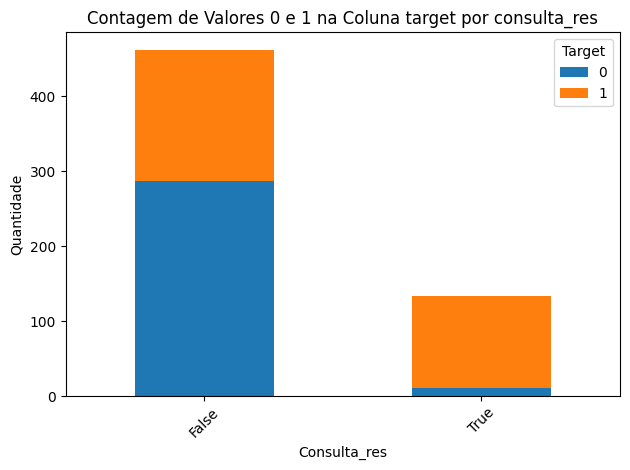

In [27]:
# Contar os valores de target para cada grupo em consulta_res
X_y_combined = pd.concat([X_train, y_train], axis=1)
contagem =X_y_combined.groupby(['consulta_res_RES3', 'target']).size().unstack(fill_value=0)
print(contagem)
# Plotar o gráfico
contagem.plot(kind='bar', stacked=True)
plt.title('Contagem de Valores 0 e 1 na Coluna target por consulta_res')
plt.xlabel('Consulta_res')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['0', '1'])
plt.tight_layout()
plt.show()

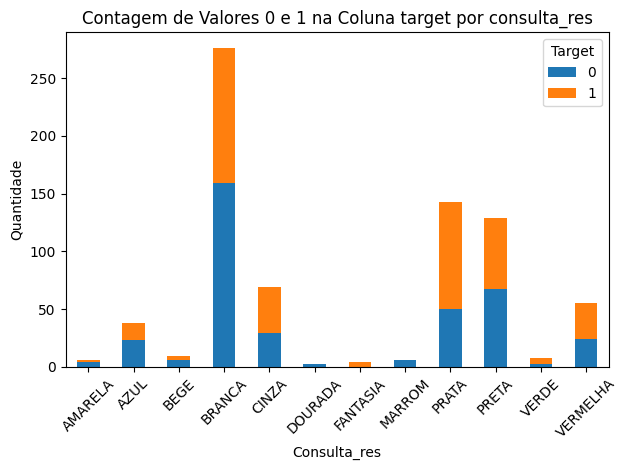

In [ ]:
# Contar os valores de target para cada grupo em consulta_res
contagem = df.groupby(['cor', 'target']).size().unstack(fill_value=0)

# Plotar o gráfico
contagem.plot(kind='bar', stacked=True)
plt.title('Contagem de Valores 0 e 1 na Coluna target por consulta_res')
plt.xlabel('Consulta_res')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['0', '1'])
plt.tight_layout()
plt.show()

In [ ]:
contagem = df.groupby(['cor', 'target']).size().unstack(fill_value=0)
# Passo 2: Calcular a porcentagem
porcentagem = contagem.div(contagem.sum(axis=1), axis=0) * 100

porcentagem = round(porcentagem,2)

# Passo 3: Exibir o resultado
print(porcentagem)
print("")
print(contagem)

target         0       1
cor                     
AMARELA    66.67   33.33
AZUL       60.53   39.47
BEGE       66.67   33.33
BRANCA     57.61   42.39
CINZA      42.03   57.97
DOURADA   100.00    0.00
FANTASIA    0.00  100.00
MARROM    100.00    0.00
PRATA      34.97   65.03
PRETA      51.94   48.06
VERDE      25.00   75.00
VERMELHA   43.64   56.36

target      0    1
cor               
AMARELA     4    2
AZUL       23   15
BEGE        6    3
BRANCA    159  117
CINZA      29   40
DOURADA     2    0
FANTASIA    0    4
MARROM      6    0
PRATA      50   93
PRETA      67   62
VERDE       2    6
VERMELHA   24   31


## Pre-processamento dos Dados

In [4]:
#df['target'] = df['target'].replace({0: 'lícito', 1: 'ilícito'})
target_names = df['target'].unique()

# Usando mais de uma coluna e convertendo pelo dummies
X = df[['tempofronteira','categoria','cor','tipodocumentoproprietario',
        'tipo','municipioemplacamento','ufemplacamento','marca','modelo','consulta_res',
        'anomodelo','dataemissaocrv','unicodono']]

# GetDumies
X = pd.get_dummies(X, columns=['categoria','cor','tipodocumentoproprietario',
        'tipo','municipioemplacamento','ufemplacamento','marca','modelo','consulta_res'])

y = df['target']

# Dividir dataset em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Normalização
#selected_columns = ['dataemissaocrv','anomodelo']
#selected_columns = ['tempofronteira', 'anomodelo', 'dataemissaocrv']
#scaler = StandardScaler()
#X_train[selected_columns] = scaler.fit_transform(X_train[selected_columns])
#X_test[selected_columns] = scaler.transform(X_test[selected_columns])


# Normalização das Colunas Numéricas
#numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
# Ajustar o scaler em X_train e transformar
#X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
# Usar o scaler ajustado para transformar X_test
#X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
# Selecionar colunas categóricas
#categorical_features = X.select_dtypes(include=['object', 'category']).columns
#onehotencoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para evitar a dummy trap
#ct = ColumnTransformer(transformers=[('onehot', onehotencoder, categorical_features)], remainder='passthrough')
#X = ct.fit_transform(X)
# Converter de volta para DataFrame, preservando os nomes das colunas
#X = pd.DataFrame(X, columns=ct.get_feature_names_out())

# Visualizar o DataFrame com as colunas codificadas
#print(X_encoded.head())






# Conversão pelo onhotencoder e pipeline
#col_transf = make_column_transformer((OneHotEncoder(), ['categoria','cor']),
#                                    remainder='passthrough')
#col_transf = make_column_transformer(
#    (OneHotEncoder(), ['categoria','cor','tipodocumentoproprietario','tipo',
#                       'municipioemplacamento','ufemplacamento',
#                       'marca','modelo','consulta_res']),
#    remainder='passthrough')

#X = df.loc[:, ['pclass']]
#y = df.survived

## Modelos - Classificação - Busca Automatizada

In [ ]:
#pip install xgboost lightgbm catboost

# Modelo Automatizado

# Configurando o logger do LightGBM
lgb_logger = logging.getLogger("lightgbm")
lgb_logger.setLevel(logging.ERROR)

# Modelos de Machine Learning
modelos = {
    'Regressão Logística': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Habilitar probabilidade para Voting
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
    'Perceptron': Perceptron(),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'Quadratic Discriminant Analysis (QDA)': QuadraticDiscriminantAnalysis(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(verbosity=-1)
    #'CatBoost': CatBoostClassifier(verbose=0)  # Silenciar output do CatBoost
}

# Cross-Validation para cada modelo individual
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)

    # Cross-Validation com 3 folds
    cv_result = cross_val_score(modelo, X_train, y_train, cv=3, scoring='accuracy')

    # Exibindo resultados
    print(f"\033[1mCross-Validation - {nome} (Média): \033[0m {cv_result.mean()*100:.2f}%")
    print(f"\033[1mCross-Validation - {nome} (Desvio Padrão): \033[0m {cv_result.std()*100:.2f}%")
    print(f"\033[1mCross-Validation - {nome} (Resultados): \033[0m {cv_result}")
    print("")

# Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svm', ExtraTreesClassifier())
], voting='soft')

# Cross-Validation para Voting Classifier
cv_result_voting = cross_val_score(voting_model, X_train, y_train, cv=3, scoring='accuracy')
print(f"\033[1mCross-Validation - Voting Classifier (Média): \033[0m {cv_result_voting.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - Voting Classifier (Desvio Padrão): \033[0m {cv_result_voting.std()*100:.2f}%")
print(f"\033[1mCross-Validation - Voting Classifier (Resultados): \033[0m {cv_result_voting}")
print("")

# Stacking Classifier
estimators = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('knn', KNeighborsClassifier())
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Cross-Validation para Stacking Classifier
cv_result_stacking = cross_val_score(stacking_model, X_train, y_train, cv=3, scoring='accuracy')
print(f"\033[1mCross-Validation - Stacking Classifier (Média): \033[0m {cv_result_stacking.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - Stacking Classifier (Desvio Padrão): \033[0m {cv_result_stacking.std()*100:.2f}%")
print(f"\033[1mCross-Validation - Stacking Classifier (Resultados): \033[0m {cv_result_stacking}")


## GridSearch - Buscar Hiperparâmetros

### Busca Bayesiana

In [138]:
# HyperOpt - Busca Bayesiana

#!pip install hyperopt

from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale, normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Modelos - aqui são as classes, não as instâncias já criadas
models = {
    'logistic_regression': LogisticRegression,
    'rf': RandomForestClassifier,
    'knn': KNeighborsClassifier,
    'svc': SVC,
    'decision_tree': DecisionTreeClassifier,
    'xgboost': XGBClassifier
}

def search_space(model):
    model = model.lower()
    space = {}
    if model == 'knn':
        space = {
            'n_neighbors': hp.choice('n_neighbors', range(3, 100)),
            'p': hp.choice('p', range(1, 20))
            #'scale': hp.choice('scale', [0, 1]),
            #'normalize': hp.choice('normalize', [0, 1]),
        }
    elif model == 'svc':
      space = {
          'C': hp.uniform('C', 0, 1000),
          #'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
          'gamma': hp.choice('gamma', ['auto', 'scale']),  # Substitua 'RS*' por 'scale'
          'class_weight': hp.choice('class_weight', ['balanced', None])  # Corrigido de 'kernel' para 'class_weight'
      }

    elif model == 'logistic_regression':
        space = {
            #'fit_intercept': hp.choice('fit_intercept', [True, False]),
            #'C': hp.uniform('C', 0.05, 3),
            'C': hp.uniform('C', 0.05, 100),
            'solver': hp.choice('solver', ['liblinear']),
            #'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear']),
            #'max_iter': hp.choice('max_iter', range(2, 1000)),
            #'multi_class': 'auto',
            #'class_weight': 'balanced'
            'penalty': hp.choice('penalty',['l1','l2'])
        }

    elif model == 'rf':
        space = {
            'max_depth': hp.choice('max_depth', range(1, 200)),
            'min_samples_split': hp.choice('min_samples_split', range(2, 40)),
            'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 20)),
            'max_features': hp.choice('max_features', range(1, 3)),
            'n_estimators': hp.choice('n_estimators', range(50, 1200))
        }

    elif model == 'decision_tree':  # Adicionando Decision Tree
        space = {
            'criterion': hp.choice('criterion', ['gini', 'entropy']),
            'max_depth': hp.choice('max_depth', range(1, 100)),
            'min_samples_split': hp.choice('min_samples_split', range(2, 100)),
            'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 20)),
            'max_features': hp.choice('max_features', ['sqrt', 'log2', None])
        }

    elif model == 'xgboost':  # Adicionando espaço de busca para o XGBoost
        space = {
            'eta': hp.choice('eta', [0.01, 0.015, 0.025, 0.05, 0.1]),
            'gamma': hp.choice('gamma', [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]),
            'max_depth': hp.choice('max_depth', [3, 5, 7, 9, 12, 15, 17, 25]),
            'min_child_weight': hp.choice('min_child_weight', [1, 3, 5, 7]),
            'subsample': hp.choice('subsample', [0.6, 0.7, 0.8, 0.9, 1.0]),
            'colsample_bytree': hp.choice('colsample_bytree', [0.6, 0.7, 0.8, 0.9, 1.0]),
            'lambda': hp.choice('lambda', [0.01, 0.1, 1.0]),  # RS* não é suportado diretamente
            'alpha': hp.choice('alpha', [0, 0.1, 0.5, 1.0])   # RS* removido para evitar erro
         }

    space['model'] = model
    return space

def get_acc_status(clf, X_, y):
    acc = cross_val_score(clf, X_, y, cv=5).mean()
    return {'loss': -acc, 'status': STATUS_OK}

def scale_normalize(params, X_):
    if params.get('scale', 0):
        X_ = scale(X_)
    if params.get('normalize', 0):
        X_ = normalize(X_)
    return X_

def obj_fnc(params):
    model_name = params.get('model').lower()
    X_ = scale_normalize(params, X_train[:])  # Agora usando X_train
    del params['model']

    # Instanciar o modelo com os parâmetros ajustados
    clf = models[model_name](**params)

    return get_acc_status(clf, X_, y_train)  # Agora usando y_train

hypopt_trials = Trials()

# Executando a busca bayesiana
best_params = fmin(
    fn=obj_fnc,
    space=search_space('xgboost'),  # Ajuste aqui o modelo desejado ('knn', 'svc', etc.)
    algo=tpe.suggest,
    max_evals=100,
    trials=hypopt_trials
)

print(best_params)
print(hypopt_trials.best_trial['result']['loss'])


100%|██████████| 100/100 [11:15<00:00,  6.76s/trial, best loss: -0.8489775910364145]
{'alpha': 0, 'colsample_bytree': 3, 'eta': 4, 'gamma': 0, 'lambda': 2, 'max_depth': 6, 'min_child_weight': 0, 'subsample': 2}
-0.8489775910364145


### Random Forest

In [42]:
# Grid Search - RandomForest

randomforest = RandomForestClassifier(random_state=100)

param_grid = {
    'n_estimators': [880,890,900,910,920],
    'max_depth': [120,130,140,150],
    'min_samples_split': [4],
    'min_samples_leaf': [1],
    'max_features': ['log2']
    #'bootstrap': [True, False]
}


# Realizar a busca de hiperparâmetros com validação cruzada
grid_search = GridSearchCV(randomforest, param_grid, cv=3, n_jobs=-1, scoring='average_precision')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibir os melhores hiperparâmetros e o F1-Score
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("F1-Score: ", grid_search.best_score_)

Melhores hiperparâmetros: {'max_depth': 120, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 920}
F1-Score:  0.9129097501036743


### Regressão Logística

In [ ]:
# Grid Search - Regressão Logística

logistic_regression = LogisticRegression(random_state=100, solver='liblinear')

param_grid = {
    'C': [8,9,10,11,12,13],           # Parâmetro de regularização
    'penalty': ['l1', 'l2'],                # Tipo de penalidade (l1 = Lasso, l2 = Ridge)
    'max_iter': [70, 80, 90, 100]             # Número máximo de iterações
}

# Realizar a busca de hiperparâmetros com validação cruzada
grid_search = GridSearchCV(logistic_regression, param_grid, cv=3, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibir os melhores hiperparâmetros e o F1-Score
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("F1-Score: ", grid_search.best_score_)

Melhores hiperparâmetros: {'C': 10, 'max_iter': 70, 'penalty': 'l1'}
F1-Score:  0.80369796956776


### Árvore de Decisão

In [ ]:
# Grid Search - Árvore de Decisão

decision_tree = DecisionTreeClassifier(random_state=100)

param_grid = {
    'max_depth': [20,30,40,50,60,70,80,90],        # Profundidade máxima da árvore
    'min_samples_split': [5,10,15,20],           # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1,2,3]             # Número mínimo de amostras que um nó folha pode ter
    #'criterion': ['gini', 'entropy']           # Critério de divisão (Gini ou Entropia)
}


# Realizar a busca de hiperparâmetros com validação cruzada
grid_search = GridSearchCV(decision_tree, param_grid, cv=3, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibir os melhores hiperparâmetros e o F1-Score
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("F1-Score: ", grid_search.best_score_)

Melhores hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
F1-Score:  0.7994180760138208


### SVM

In [ ]:
# Grid Search - SVM

svm = SVC(random_state=100)

param_grid = {
    'C': [1,2,3],                    # Parâmetro de regularização C
    'kernel': ['linear', 'rbf', 'poly'],        # Função de kernel a ser usada
    'degree': [1,2,3],                       # Grau do polinômio se o kernel for 'poly'
    'gamma': ['scale', 'auto'],                # Coeficiente do kernel rbf, poly, ou sigmoid
}

# Realizar a busca de hiperparâmetros com validação cruzada
grid_search = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibir os melhores hiperparâmetros e o F1-Score
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("F1-Score: ", grid_search.best_score_)

Melhores hiperparâmetros: {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
F1-Score:  0.7854134565998973


### KNN

In [ ]:
# Grid Search - KNN

knn = KNeighborsClassifier()

# Definir a grade de hiperparâmetros
param_grid = {
    'n_neighbors': [1,2,3,4,5, 6, 7, 8],          # Número de vizinhos
    'weights': ['uniform', 'distance'],       # Ponderação dos vizinhos
    'p': [1,2,3,4,5, 6, 7, 8, 9],          # Número de vizinhos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distância usada
}

# Realizar a busca de hiperparâmetros com validação cruzada
grid_search = GridSearchCV(knn, param_grid, cv=3, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibir os melhores hiperparâmetros e o F1-Score
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("F1-Score: ", grid_search.best_score_)

Melhores hiperparâmetros: {'metric': 'manhattan', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
F1-Score:  0.7880567307127327


### XGBoost

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Instanciar o modelo XGBoost
xgb = XGBClassifier(objective='multi:softmax', num_class=2, random_state=100)

# Definir a grade de hiperparâmetros para busca
param_grid = {
    'learning_rate': [0.2],  # Taxa de aprendizado
    'max_depth': [7],              # Profundidade máxima das árvores
    'n_estimators': [155],       # Número de árvores
    'min_child_weight': [1],             # Peso mínimo da criança
    'subsample': [0.7],         # Proporção de amostras utilizadas
    'colsample_bytree': [1],  # Proporção de colunas utilizadas
    'gamma': [0],               # Parâmetro de regularização
    'lambda': [0.1],                     # Regularização L2
    'eta': [0.01],                     # Regularização L2
    'alpha': [0]                       # Regularização L1
}
"""
xgboost = XGBClassifier(
    objective='multi:softmax',
    #objective='binary:hinge',
    num_class=2,
    random_state=100,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=300
).fit(X_train, y_train)
"""
# Realizar a busca de hiperparâmetros com validação cruzada
grid_search = GridSearchCV(xgb, param_grid, cv=3, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibir os melhores hiperparâmetros e o F1-Score
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("F1-Score: ", grid_search.best_score_)


Melhores hiperparâmetros: {'alpha': 0, 'colsample_bytree': 1, 'eta': 0.01, 'gamma': 0, 'lambda': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 155, 'subsample': 0.7}
F1-Score:  0.8235286646412864


In [ ]:
# Grid Search - Votting - Parâmetros Internos

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

reglog = LogisticRegression(max_iter=90, penalty="l1", solver="liblinear", C=10).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=7, metric="manhattan", weights="distance").fit(X_train, y_train)
decisiontree = DecisionTreeClassifier(max_depth=24, criterion="gini", min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)
randomforest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=100).fit(X_train, y_train)
svm = SVC(probability=True, C=1, degree=1, gamma="scale", kernel="linear").fit(X_train, y_train)

# Criando o VotingClassifier com os estimadores
voting_clf = VotingClassifier(
    estimators=[
        ('lr', reglog),
        ('rf', knn),
        ('svc', decisiontree),
        ('dtree', randomforest),
        ('svm', svm)
    ]
)

# Definindo a grade de hiperparâmetros do VotingClassifier
param_grid = {
    'voting': ['hard', 'soft'],
        'weights': [
        [1, 1, 1, 1, 1],                           # Pesos iguais para todos os modelos
        [2, 1, 1, 1, 1],                           # Maior peso para a regressão logística
        [1, 2, 1, 1, 1],                           # Maior peso para o KNN
        [1, 1, 2, 1, 1],                           # Maior peso para o SVC
        [1, 1, 1, 2, 1],                           # Maior peso para a Árvore de Decisão
        [1, 1, 1, 1, 2] ]                           # Maior peso para o Random Forest
}

# Executando a busca por hiperparâmetros com validação cruzada
grid_search = GridSearchCV(voting_clf, param_grid, cv=3, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibir os melhores hiperparâmetros e o F1-Score
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("F1-Score: ", grid_search.best_score_)


Melhores hiperparâmetros: {'voting': 'hard', 'weights': [2, 1, 1, 1, 1]}
F1-Score:  0.8025597649307611


In [ ]:
# Grid Search - XGBosting

import xgboost as xgb
from xgboost import XGBClassifier

# Definindo o modelo base
xgboost_model = XGBClassifier(objective='multi:softmax', num_class=4, random_state=100)

# Definindo a grade de hiperparâmetros
#param_grid = {
#    'eta':[0.01,0.015,0.025,0.05,0.1],
#    'gamma': [0.05-0.1, 0.3, 0.5,0.7,0.9,1.0],        # Redução de complexidade
#    'max_depth': [3, 5, 7, 9, 12,15, 17, 25],         # Profundidade máxima da árvore
#    'n_estimators': [100, 200, 300],                  # Número de árvores
#    'min_child_weight': [1, 3, 5, 7],                 # Peso mínimo da criança
#    'subsample': [0.6, 0.7, 0.8, 0,9, 1.0],           # Proporção de amostras para treinar
#    'colsample_bytree': [0.6, 0.7, 0.8, 0,9, 1.0],    # Proporção de colunas para treinar
#    'lambda': [0.01-0.1, 1.0, 'RS*'],                # Taxa de aprendizado
#    'alpha': [0.01-0.1, 1.0, 'RS*']                  # Taxa de aprendizado
#}


# Definir hiperparâmetros para o Grid Search
param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.1]
}

# Configurando a busca em grade
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid,
                           scoring='f1', cv=3, n_jobs=-1, verbose=1)

# Ajustando a busca de hiperparâmetros
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibindo os melhores hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("F1-Score:", grid_search.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Melhores hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
F1-Score: 0.7948742974426728



Modelo: KNN

Corte = 0.00
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


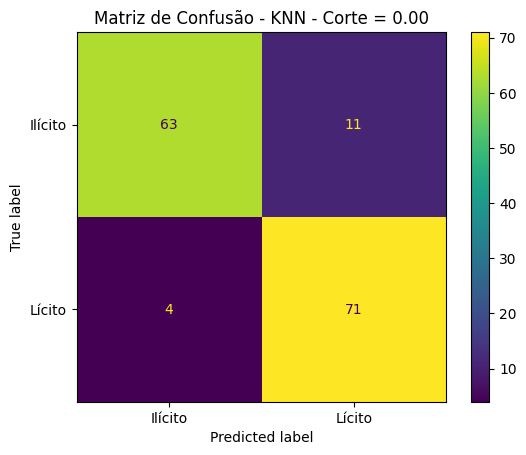


Corte = 0.01
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


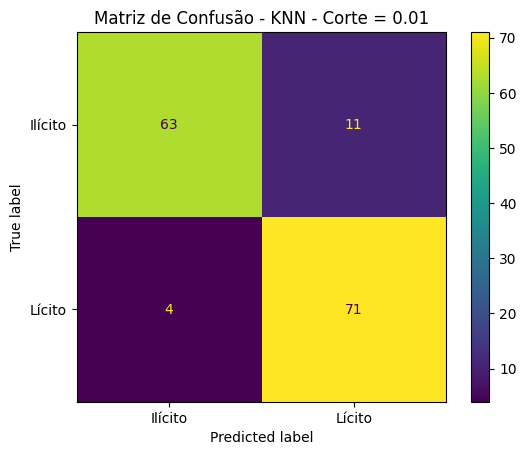


Corte = 0.02
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


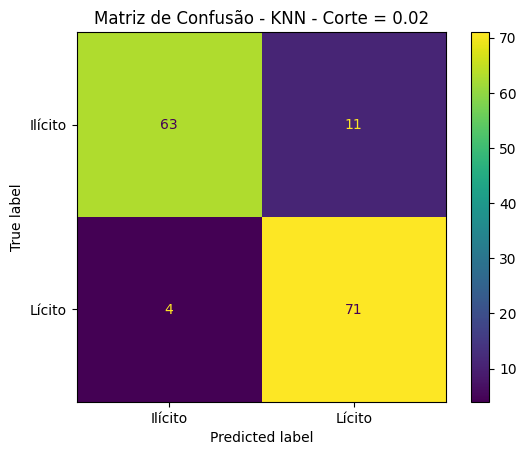


Corte = 0.03
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


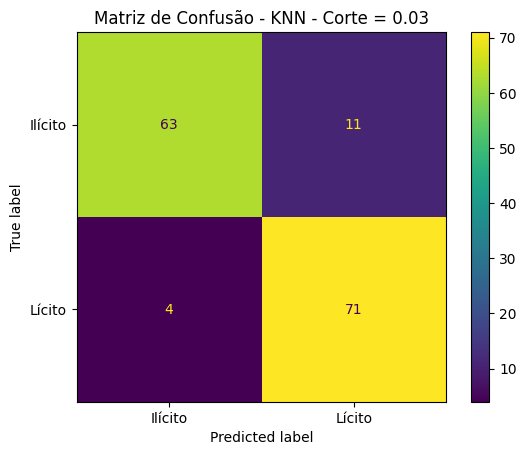


Corte = 0.04
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


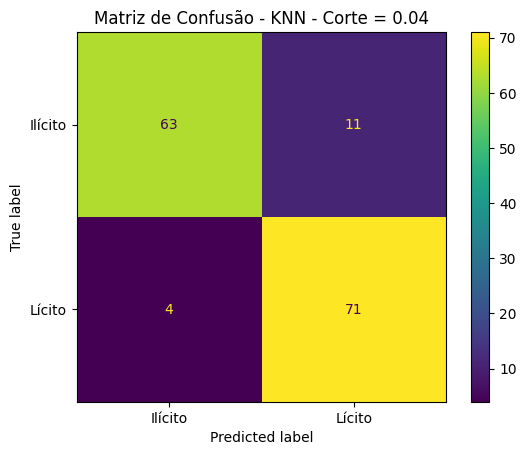


Corte = 0.05
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


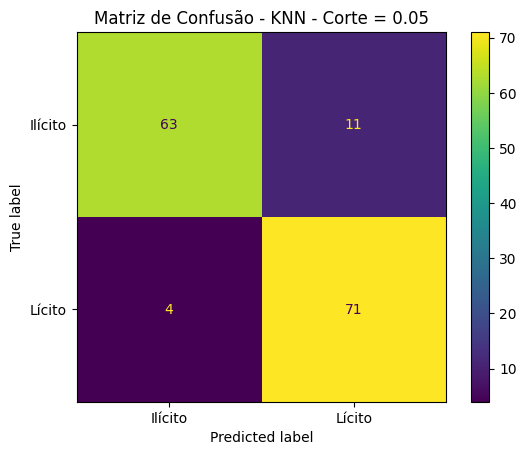


Corte = 0.06
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


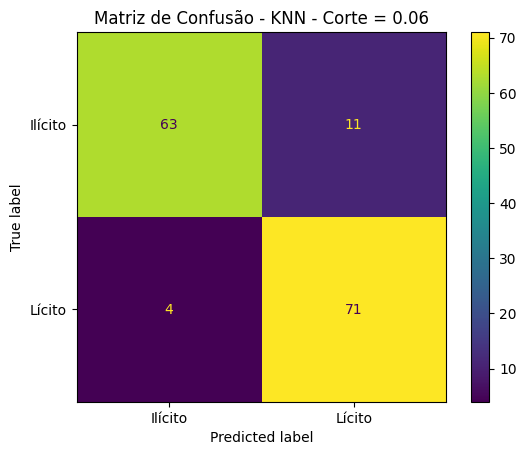


Corte = 0.07
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


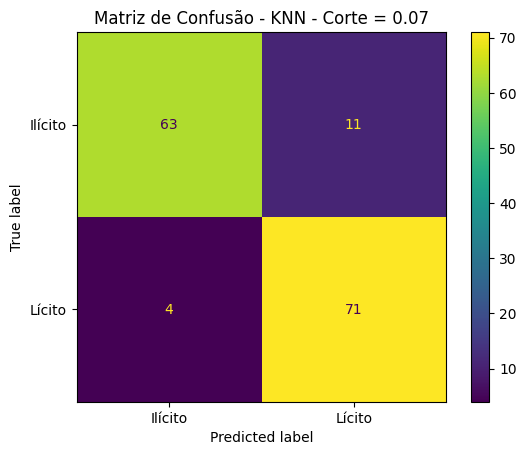


Corte = 0.08
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


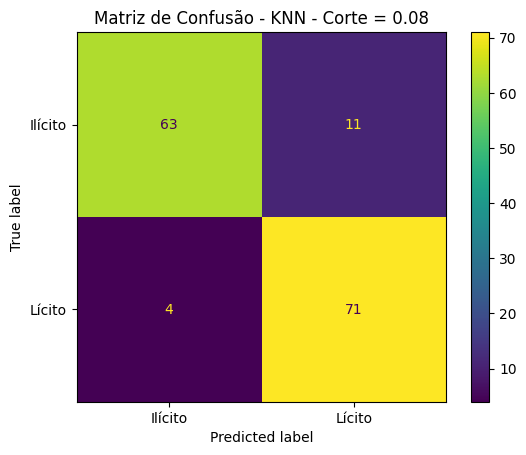


Corte = 0.09
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


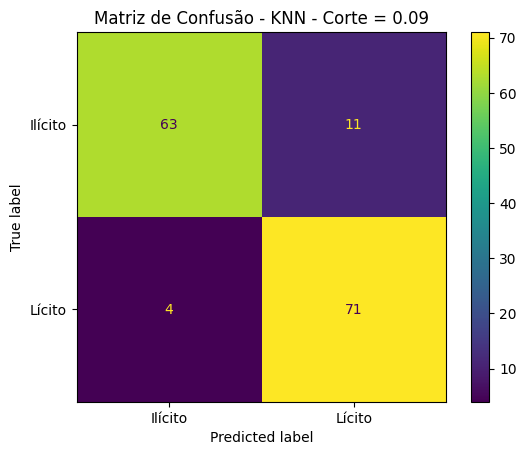


Corte = 0.10
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        74
           1       0.87      0.95      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.45%


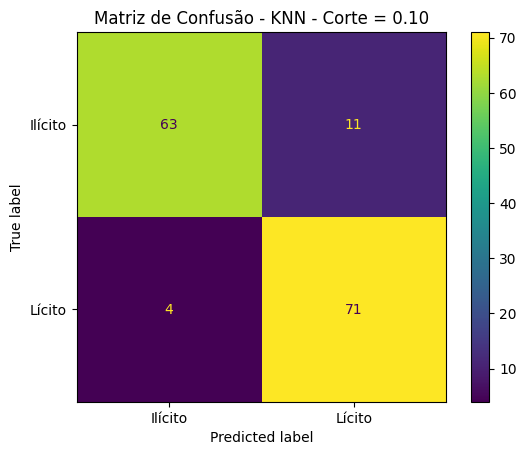


Corte = 0.11
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        74
           1       0.86      0.93      0.90        75

    accuracy                           0.89       149
   macro avg       0.90      0.89      0.89       149
weighted avg       0.90      0.89      0.89       149

Accuracy Score: 89.26%
F1 Score: 89.74%


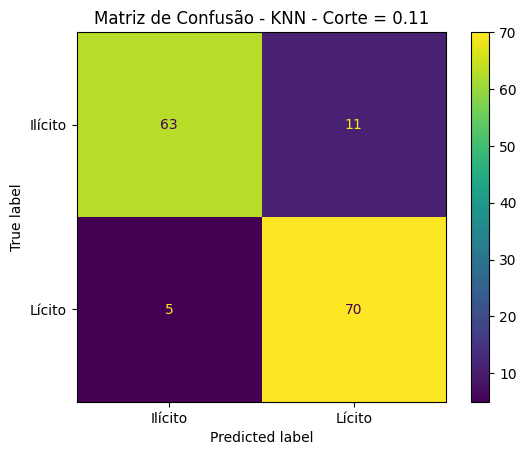


Corte = 0.12
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        74
           1       0.89      0.93      0.91        75

    accuracy                           0.91       149
   macro avg       0.91      0.91      0.91       149
weighted avg       0.91      0.91      0.91       149

Accuracy Score: 90.60%
F1 Score: 90.91%


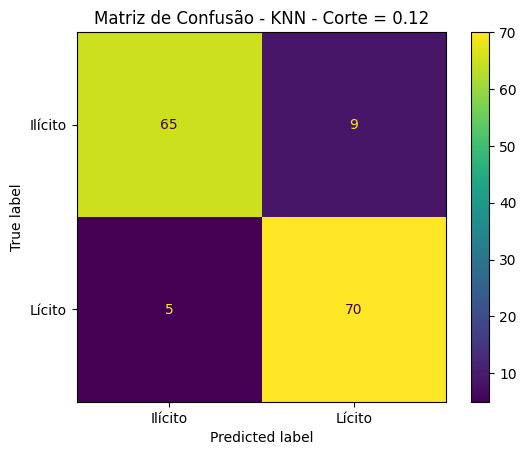


Corte = 0.13
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        74
           1       0.89      0.93      0.91        75

    accuracy                           0.91       149
   macro avg       0.91      0.91      0.91       149
weighted avg       0.91      0.91      0.91       149

Accuracy Score: 90.60%
F1 Score: 90.91%


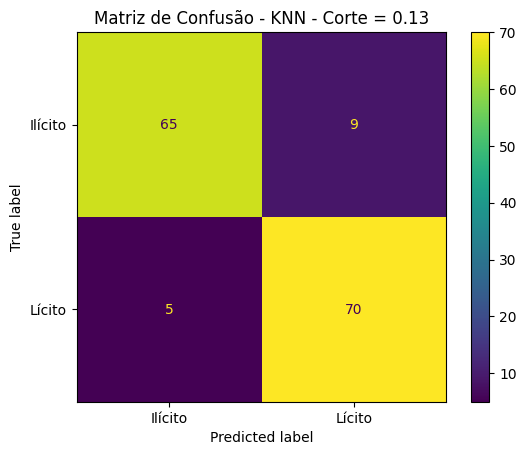


Corte = 0.14
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        74
           1       0.89      0.91      0.90        75

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

Accuracy Score: 89.93%
F1 Score: 90.07%


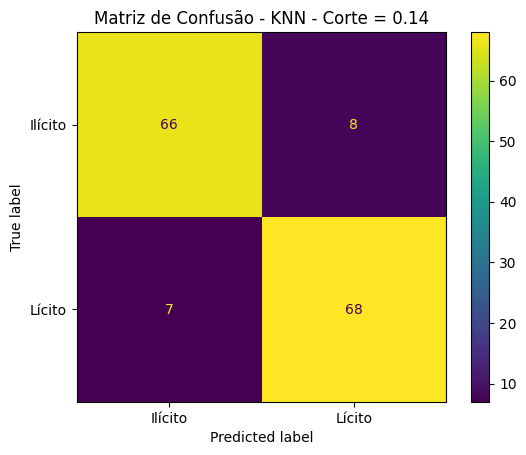

In [ ]:
# Definir os cortes de 0 a 1 com incrementos de 0.05
cortes = np.arange(0, 1.05, 0.05)

# Loop para testar cada corte
for corte in cortes:
    pred_adjusted = []

    # Ajustar as predições com base no ponto de corte
    for p in prob:
        if p[1] > corte:  # Se a probabilidade da Classe 1 for maior que o corte
            pred_adjusted.append(1)
        else:
            pred_adjusted.append(0)

    # Avaliar o modelo com base nas predições ajustadas
    print(f"\n\033[1mCorte = {corte:.2f}\033[0m")
    print(classification_report(y_test, pred_adjusted))

    # Exibir métricas adicionais
    accuracyscore = accuracy_score(y_test, pred_adjusted)
    f1score = f1_score(y_test, pred_adjusted)
    print(f"Accuracy Score: {accuracyscore*100:.2f}%")
    print(f"F1 Score: {f1score*100:.2f}%")

    # Criar a matriz de confusão com base nas predições ajustadas
    conf_matrix = confusion_matrix(y_test, pred_adjusted)

    # Exibir a matriz de confusão
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Ilícito', 'Lícito'])
    disp.plot()

    # Ajustar o aspecto e título
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"Matriz de Confusão - Corte = {corte:.2f}")
    plt.show()



              precision    recall  f1-score   support

           0       0.79      0.72      0.75        74
           1       0.74      0.81      0.78        75

    accuracy                           0.77       149
   macro avg       0.77      0.76      0.76       149
weighted avg       0.77      0.77      0.76       149


Accuracy Score: 76.51%
LRL Score: 81.88%
F1 Score: 77.71%


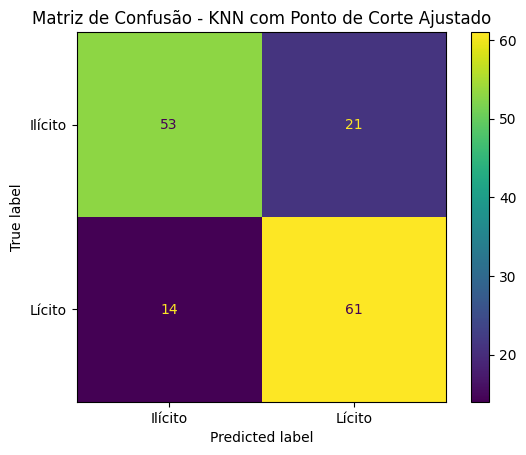

In [ ]:
# Testando corte de probabilidades

reglog = LogisticRegression(max_iter=90, penalty="l1", solver="liblinear", C=10).fit(X_train, y_train)

reglog_y_pred = reglog.predict(X_test)
prob = reglog.predict_proba(X_test)
corte = 0.1  # Limite para a classe 1 (Classe A)
pred_adjusted = []
for p in prob:
    if p[1] > corte:  # Se a probabilidade da Classe 1 for maior que 0.6
        pred_adjusted.append(1)
    elif p[1] <= corte:  # Se a probabilidade da Classe 1 for menor ou igual a 0.4
        pred_adjusted.append(0)
reglog_y_pred = pred_adjusted


print("")
print(metrics.classification_report(y_test, reglog_y_pred))
print("")

# Accuracy Score
reglog_accuracyscore = accuracy_score(y_test, reglog_y_pred)
print(f"\033[1mAccuracy Score:\033[0m {reglog_accuracyscore*100:.2f}%")

# RL Score
reglog_score = reglog.score(X_test, y_test)
print(f"\033[1mLRL Score:\033[0m {reglog_score*100:.2f}%")

# F1_score
reglog_f1score = f1_score(y_test, reglog_y_pred)
print(f"\033[1mF1 Score:\033[0m {reglog_f1score*100:.2f}%")

# Criar a matriz de confusão com base nas predições ajustadas
conf_matrix = confusion_matrix(y_test, reglog_y_pred)

# Exibir a matriz de confusão
ConfusionMatrixDisplay(conf_matrix, display_labels=['Ilícito', 'Lícito']).plot()

# Ajustar o aspecto e título
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - KNN com Ponto de Corte Ajustado")
plt.show()

## **Modelos - Classificação - Treinamento e Avaliação**

### Imprimir Árvores de Decisão

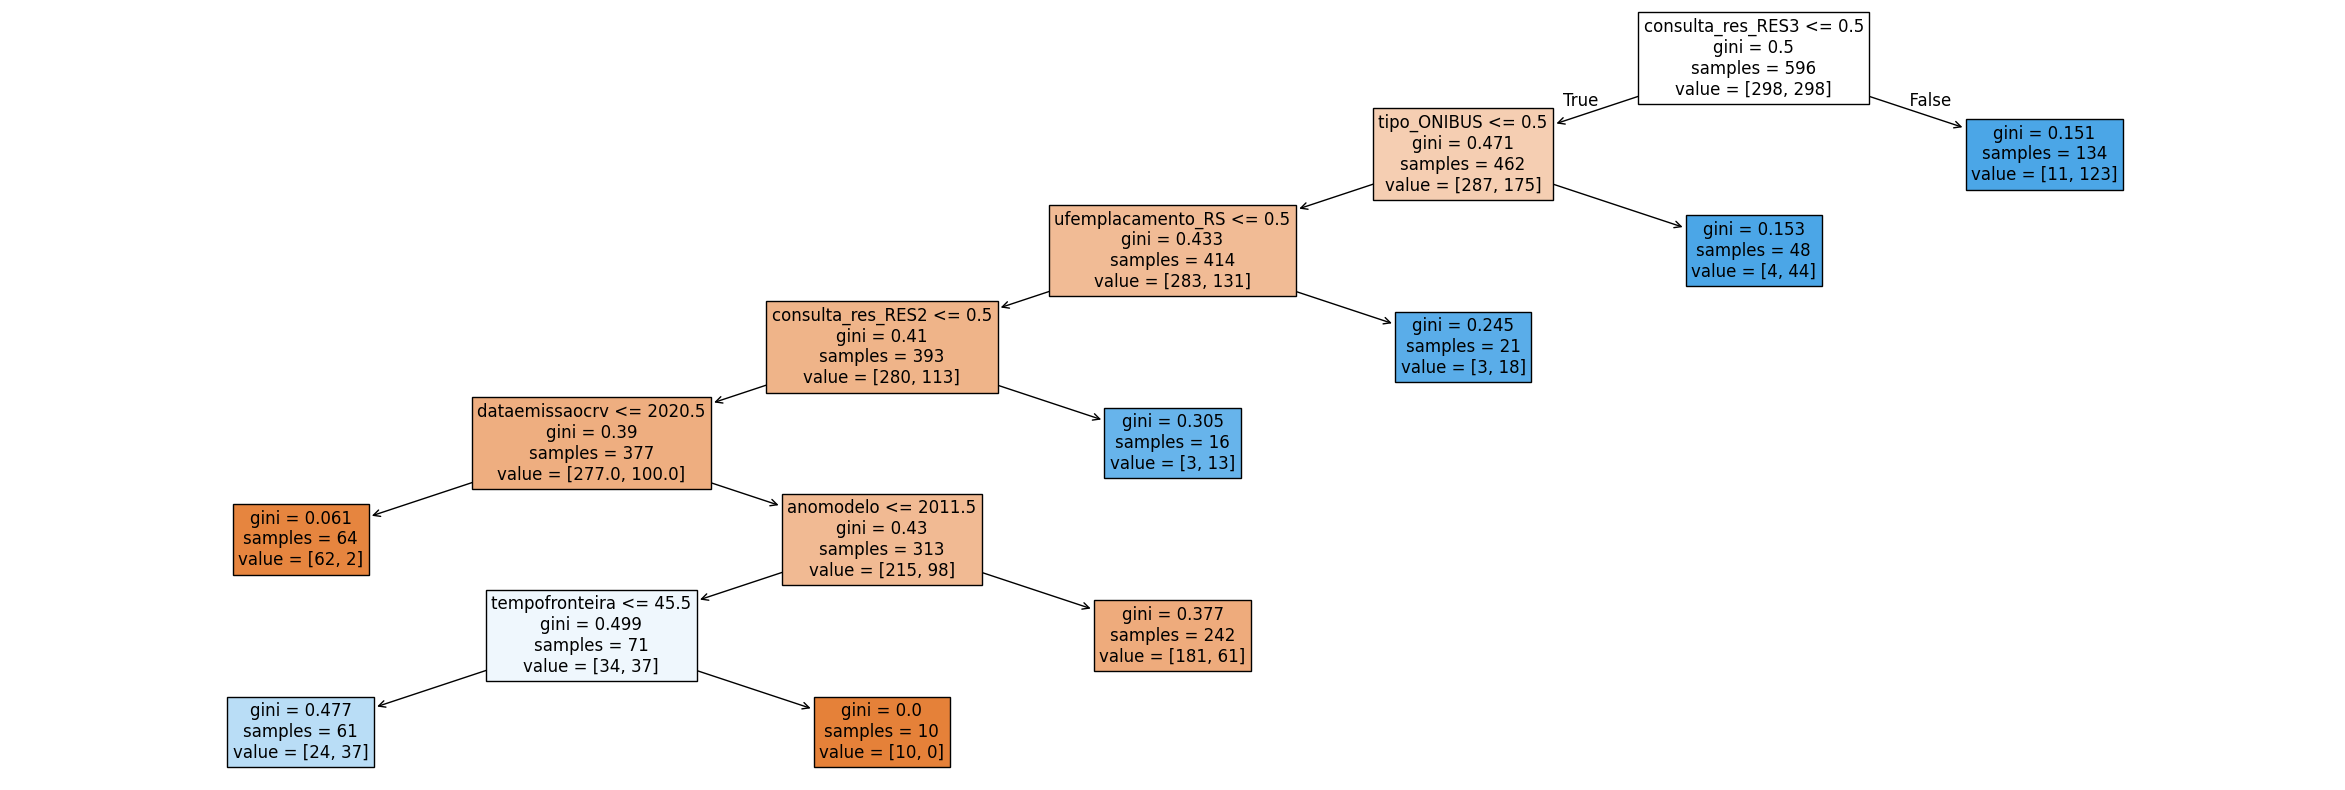

In [11]:
# Árvore de Decisão

decisiontree = DecisionTreeClassifier(
    max_depth=7,
    criterion="gini",
    min_samples_leaf=10,
    min_samples_split=10,
    min_impurity_decrease=0.01
  ).fit(X_train, y_train)

plt.figure(figsize=(30,10))
plot_tree(decisiontree, filled=True, fontsize=12, feature_names=X_train.columns)
plt.show()




In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Exportar a árvore para o formato DOT
dot_data = export_graphviz(decisiontree, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['Ilícito', 'Lícito'],
                           filled=True, rounded=True,
                           special_characters=True)

# Usar pydotplus para gerar o gráfico
graph = pydotplus.graph_from_dot_data(dot_data)

# Exibir o gráfico
Image(graph.create_png())


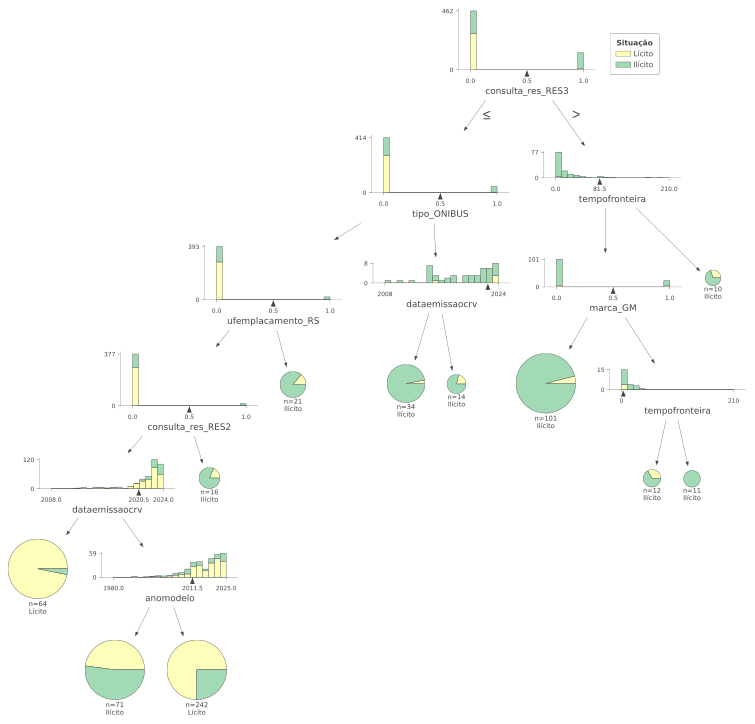

In [19]:
#!pip install -q -U dtreeviz
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import dtreeviz

decisiontree = DecisionTreeClassifier(
    max_depth=6,
    criterion="gini",
    min_samples_leaf=10,
    min_samples_split=10,
    min_impurity_decrease=0.0011
  ).fit(X_train, y_train)



viz = dtreeviz.model(decisiontree, X_train, y_train,
               target_name="Situação",
               feature_names= list(X_train.columns),
               class_names=['Lícito','Ilícito'])

viz.view(scale=1)

# Salvar a árvore como um arquivo DOT
#viz.save("tree.dot")

# Converter o arquivo DOT em PNG
#graphviz.render('dot', 'png', 'tree.dot')

# Fazer o download do arquivo PNG
#from google.colab import files
#files.download('tree.png')

#viz.save("arvore_de_decisao.png")

#svg_code = viz.svg()  # Gerar o código SVG da visualização

# Salvar o arquivo SVG no diretório
#with open("arvore_de_decisao.svg", "w") as f:
#    f.write(svg_code)

#from google.colab import files
#files.download("arvore_de_decisao.svg")



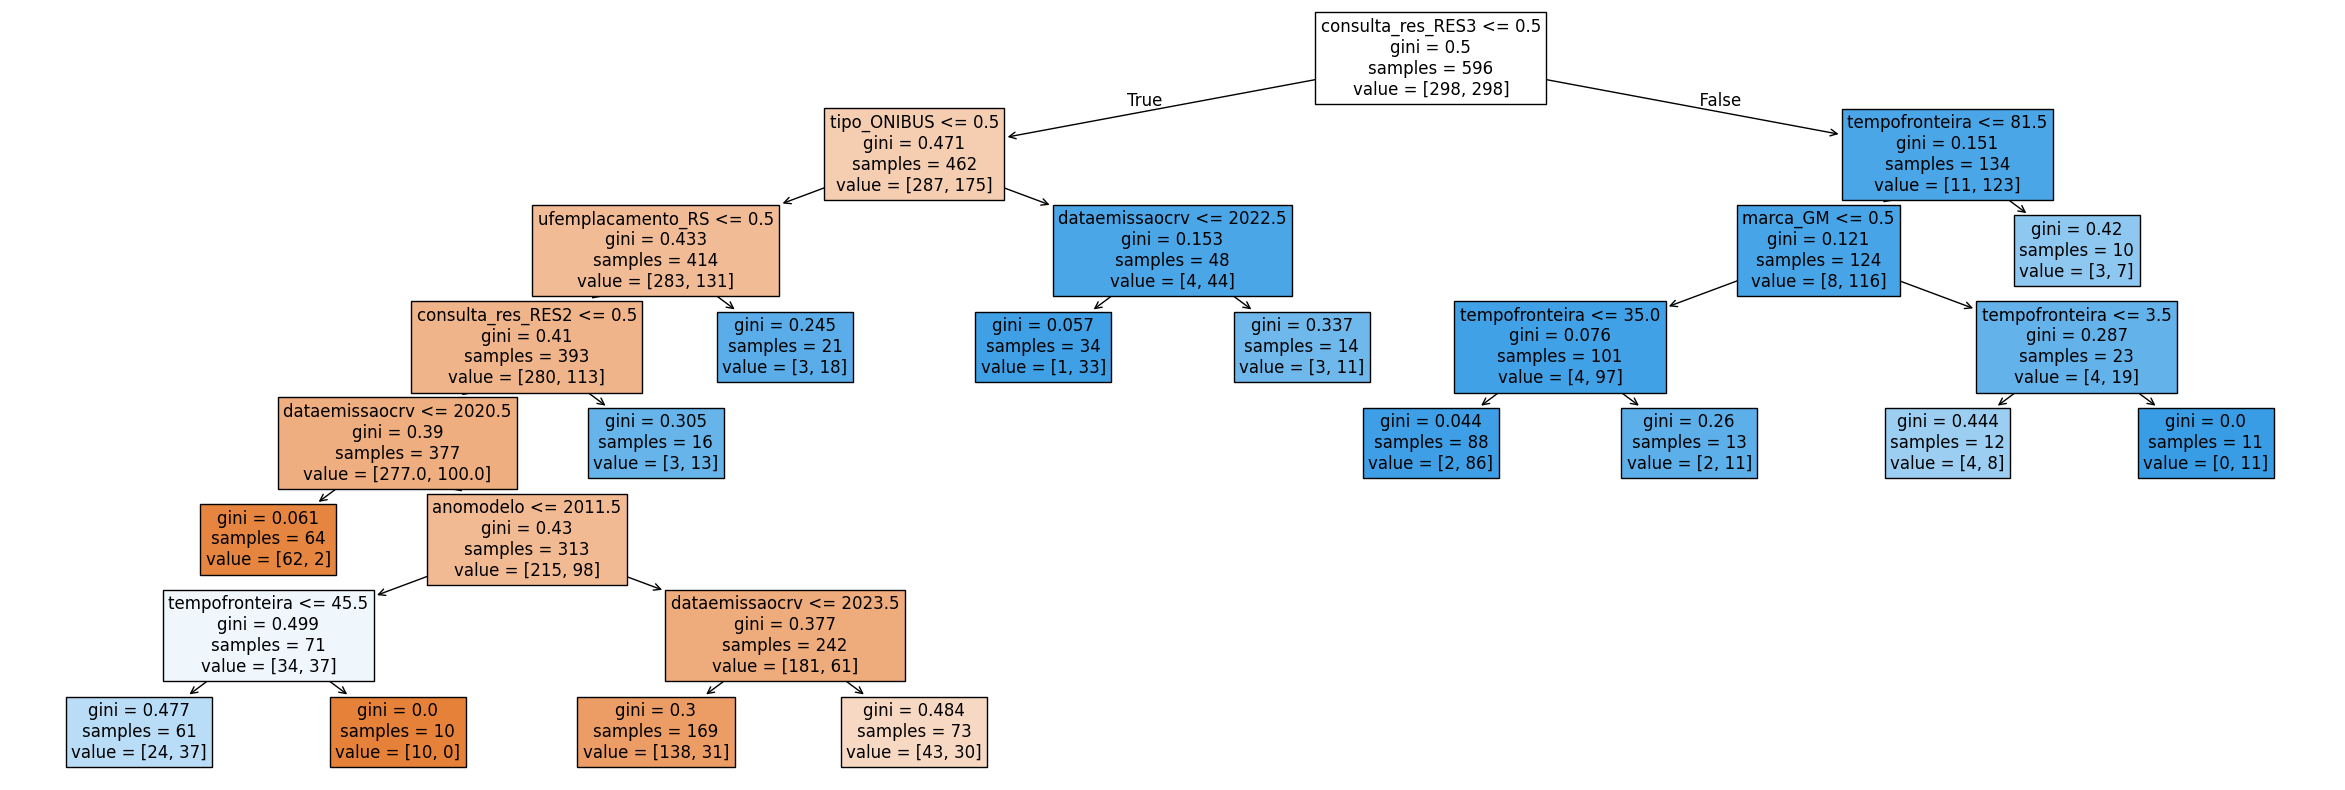

In [ ]:
# Árvore de Decisão

decisiontree = DecisionTreeClassifier(
    max_depth=7,
    criterion="gini",
    min_samples_leaf=10,
    min_samples_split=10,
    min_impurity_decrease=0.0005
  ).fit(X_train, y_train)

plt.figure(figsize=(30,10))
plot_tree(decisiontree, filled=True, fontsize=12, feature_names=X_train.columns)
plt.show()




### Executar Modelos


>>>>> REGRESSÃO LOGÍSTICA 
Cross-Validation - RegLog (Média):  80.54%
Cross-Validation - RegLog (Desvio Padrão):  0.64%
Cross-Validation - RegLog (Resultados):  [0.79899497 0.81407035 0.8030303 ]]]


              precision    recall  f1-score   support

           0       0.81      0.93      0.87        74
           1       0.92      0.79      0.85        75

    accuracy                           0.86       149
   macro avg       0.87      0.86      0.86       149
weighted avg       0.87      0.86      0.86       149


Accuracy Score: 85.91%
LRL Score: 85.91%
F1 Score: 84.89%


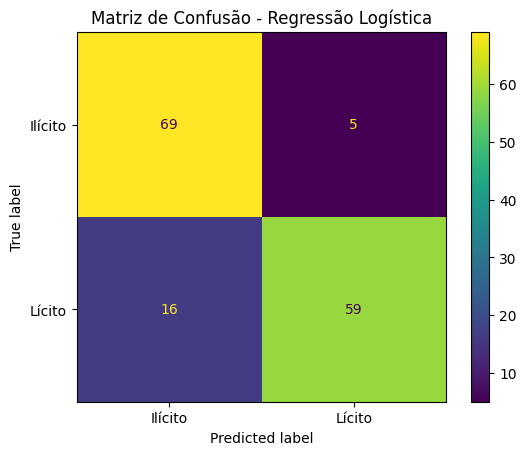

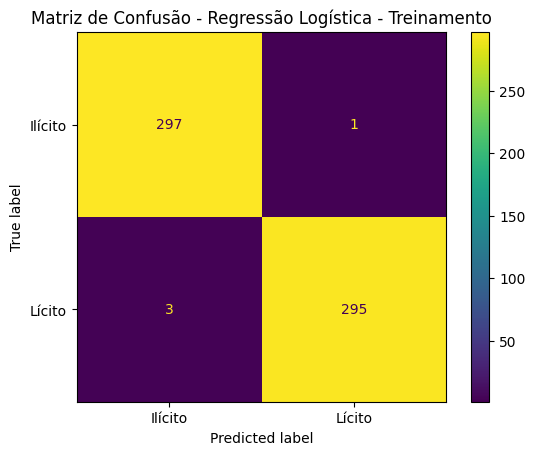


>>> KNN 
Cross-Validation - KNN (Média):  71.31%
Cross-Validation - KNN (Desvio Padrão):  1.46%
Cross-Validation - KNN (Resultados):  [0.69346734 0.72864322 0.71717172]]]


              precision    recall  f1-score   support

           0       0.75      0.95      0.84        74
           1       0.93      0.69      0.79        75

    accuracy                           0.82       149
   macro avg       0.84      0.82      0.82       149
weighted avg       0.84      0.82      0.82       149


Accuracy Score: 81.88%
KNN Score: 81.88%
F1 Score: 79.39%


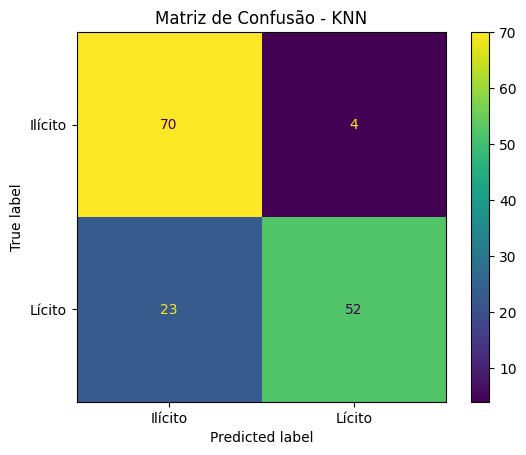

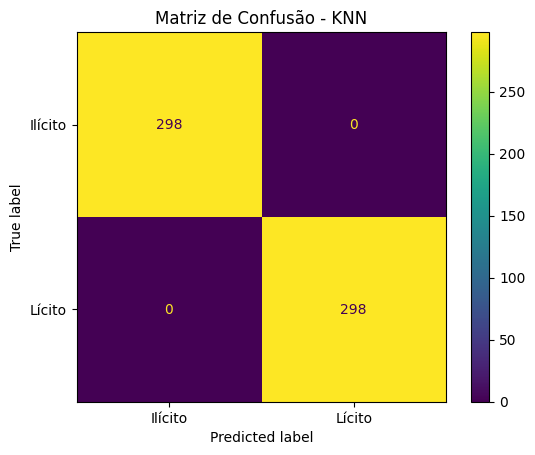


>>> ÁRVORE DE DECISÃO 
Cross-Validation - Decision Tree (Média):  79.19%
Cross-Validation - Decision Tree (Desvio Padrão):  2.37%
Cross-Validation - Decision Tree (Resultados):  [0.7839196  0.8241206  0.76767677]]]


              precision    recall  f1-score   support

           0       0.70      0.77      0.73        74
           1       0.75      0.67      0.70        75

    accuracy                           0.72       149
   macro avg       0.72      0.72      0.72       149
weighted avg       0.72      0.72      0.72       149


Accuracy Score: 71.81%
Árvore de Decisão Score: 71.81%
F1 Score: 70.42%


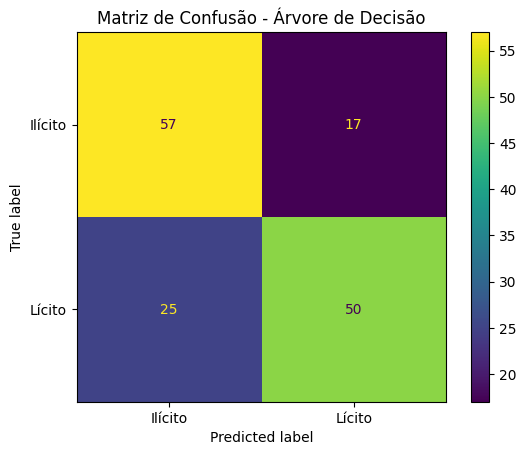


>>> RANDOM FOREST 
Cross-Validation - Random Forest (Média):  81.54%
Cross-Validation - Random Forest (Desvio Padrão):  0.97%
Cross-Validation - Random Forest (Resultados):  [0.80904523 0.82914573 0.80808081]]]


              precision    recall  f1-score   support

           0       0.81      0.91      0.85        74
           1       0.89      0.79      0.84        75

    accuracy                           0.85       149
   macro avg       0.85      0.85      0.85       149
weighted avg       0.85      0.85      0.85       149


Accuracy Score: 84.56%
Random Forest Score: 84.56%
F1 Score: 83.69%


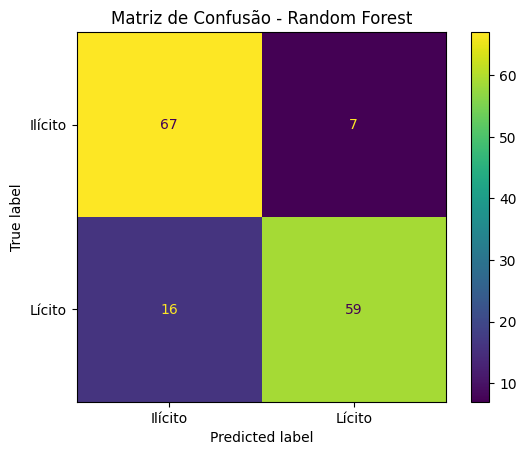

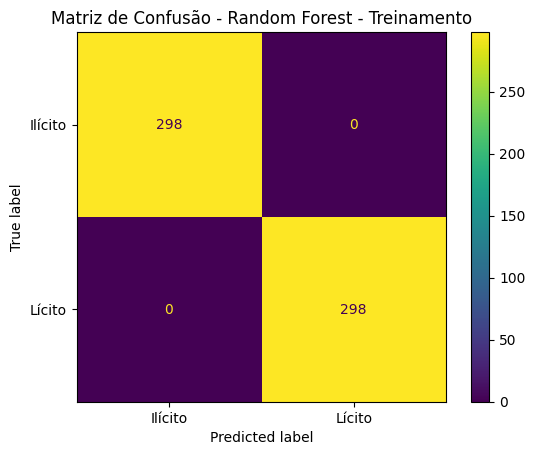


>>> SVM 
Cross-Validation - SVM (Média):  78.86%
Cross-Validation - SVM (Desvio Padrão):  0.46%
Cross-Validation - SVM (Resultados):  [0.78894472 0.79396985 0.78282828]]]


              precision    recall  f1-score   support

           0       0.78      0.91      0.84        74
           1       0.89      0.75      0.81        75

    accuracy                           0.83       149
   macro avg       0.83      0.83      0.82       149
weighted avg       0.83      0.83      0.82       149


Accuracy Score: 82.55%
SVM Score: 82.55%
F1 Score: 81.16%


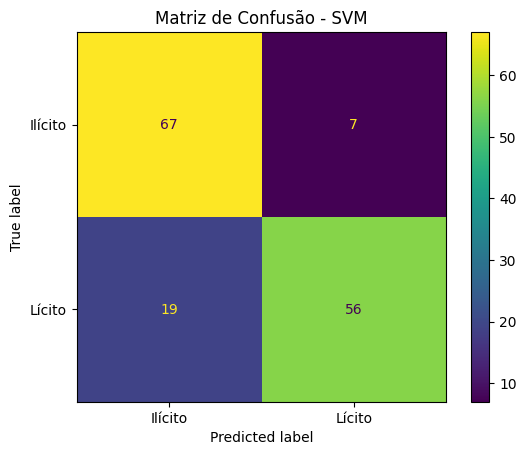

'\n\n\n\nprob = reglog.predict_proba(X_test)\nprint("")\n#df_prob = pd.DataFrame(columns=[\'tempofronteira\',\'target_atual\',\'target_prevista\', \'prob_licita\',\'prob_ilicita(1)\'])\ndf_prob = pd.DataFrame(columns=[\'tempofronteira\',\'target_atual\',\'reglog\'])\ndf_prob[\'tempofronteira\'] = X_test[\'tempofronteira\']\ndf_prob[\'dataemissaocrv\'] = X_test[\'dataemissaocrv\']\ndf_prob[\'target_atual\'] = y_test\ndf_prob[\'reglog\'] = reglog_y_pred\ndf_prob[\'randomforest\'] = randomforest_y_pred\ndf_prob[\'decisiontree\'] = decisiontree_y_pred\ndf_prob[\'knn\'] = knn_y_pred\n#df_prob[\'svm\'] = svm_y_pred\n#df_prob[\'votting\'] = votting_y_pred\n#df_prob[\'prob_licita\'] = prob[:,0]\n#df_prob[\'prob_ilicita(1)\'] = prob[:,1]\n\n#df_prob.to_excel("df_prob.xlsx", index=False)\n#files.download(\'df_prob.xlsx\')\n\nprint(df_prob.shape)\ndf_prob.head()\n'

In [5]:
# Método não automatizado

# Quantidade de repetições do Cross-Validation
nc = 3

#reglog = LogisticRegression(max_iter=1000).fit(X_train, y_train)
reglog = LogisticRegression(max_iter=155, penalty="l2", solver="liblinear", C=25).fit(X_train, y_train)

#knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=7, p=7, metric="manhattan", weights="distance").fit(X_train, y_train)

#decisiontree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
#decisiontree = DecisionTreeClassifier(max_depth=24, criterion="gini", min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)
decisiontree = DecisionTreeClassifier(max_depth=7, criterion="gini", min_samples_leaf=10, min_samples_split=10).fit(X_train, y_train)
decisiontree = DecisionTreeClassifier(
    max_depth=7,
    criterion="gini",
    min_samples_leaf=10,
    min_samples_split=10,
    min_impurity_decrease=0.01
  ).fit(X_train, y_train)

#randomforest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=100).fit(X_train, y_train)
randomforest = RandomForestClassifier(
    n_estimators=150,
    bootstrap=False,
    max_depth=40,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=100
).fit(X_train, y_train)

"""
randomforest = RandomForestClassifier(
    n_estimators=900,
    bootstrap=False,
    max_depth=120,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=4,
    random_state=100
).fit(X_train, y_train)
# 13 7
"""
#svm = SVC(probability=True).fit(X_train, y_train)
svm = SVC(probability=True, C=1, degree=1, gamma="scale", kernel="linear", class_weight='balanced').fit(X_train, y_train)
"""
votting = VotingClassifier(
    estimators=[
        ('rf', randomforest),      # Random Forest
        #('dtree', decisiontree),   # Decision Tree
        ('knn', knn),              # K-Nearest Neighbors
        ('lr', reglog)            # Regressão Logística
    ],
    voting='hard'                # Usando voto ponderado com base nas probabilidades
    #voting='soft'                # Usando voto ponderado com base nas probabilidades
    #weights=[2, 1, 1, 1, 1]       # Pesos para os estimadores (mais peso para Random Forest)
).fit(X_train, y_train)


#xgboost = XGBClassifier(objective='multi:softmax', num_class=2, random_state=42).fit(X_train, y_train)

xgboost = XGBClassifier(
    alpha=0.2506671010587842,
    colsample_bytree=0.6088415905188824,
    eta=0.09157576147684744,
    gamma=0.05431299451712704,
    reg_lambda=0.366215401622109,  # `lambda` é renomeado para `reg_lambda` no XGBoost
    max_depth=10,
    min_child_weight=1,
   n_estimators=238,
    subsample=0.6514906342297149,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=100).fit(X_train, y_train)

# 21 6


xgboost = XGBClassifier(
    objective='multi:softmax',
    #objective='binary:hinge',
    num_class=2,
    random_state=100,
    learning_rate=0.05,
    max_depth=6,
    n_estimators=200
).fit(X_train, y_train)

#18 9

xgboost = XGBClassifier(
    objective='multi:softmax',
    num_class=2,
    random_state=100,
    alpha=0,
    colsample_bytree=1,
    eta=0.01,
    gamma=0,
    reg_lambda=0.1,  # `lambda` é renomeado para `reg_lambda` no XGBoost
    max_depth=7,
    min_child_weight=1,
    learning_rate=0.2,
    n_estimatores=155,
    subsample=0.7
).fit(X_train, y_train)


## 16 5 - anterior
#Stacking

# Modelos base (nível 0)
base_learners = [
    ('rf', randomforest),
    ('knnc', knn),
    ('decisiontree', decisiontree),
    ('lr', reglog)
]

# Meta-modelo (nível 1)
meta_model = LogisticRegression()

# Instanciando o StackingClassifier
stacking = StackingClassifier(
    estimators=base_learners,        # Modelos base
    final_estimator=reglog,      # Meta-modelo
    cv=5,                            # Validação cruzada
    n_jobs=-1                        # Utiliza todos os núcleos disponíveis
).fit(X_train, y_train)


"""
# Cross-Validation - Regressão Logística
print("")
print("\033[1m>>>>> REGRESSÃO LOGÍSTICA \033[0m")
reglog_cv_result = cross_val_score(reglog, X_train, y_train, cv=nc, scoring='accuracy')
print(f"\033[1mCross-Validation - RegLog (Média): \033[0m {reglog_cv_result.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - RegLog (Desvio Padrão): \033[0m {reglog_cv_result.std()*100:.2f}%")
print(f"\033[1mCross-Validation - RegLog (Resultados): \033[0m {reglog_cv_result}]]")
print("")

reglog_y_pred = reglog.predict(X_test)

print("")
print(metrics.classification_report(y_test, reglog_y_pred))
print("")

# Accuracy Score
reglog_accuracyscore = accuracy_score(y_test, reglog_y_pred)
print(f"\033[1mAccuracy Score:\033[0m {reglog_accuracyscore*100:.2f}%")

# RL Score
reglog_score = reglog.score(X_test, y_test)
print(f"\033[1mLRL Score:\033[0m {reglog_score*100:.2f}%")

# F1_score
reglog_f1score = f1_score(y_test, reglog_y_pred)
print(f"\033[1mF1 Score:\033[0m {reglog_f1score*100:.2f}%")

# Matriz de Confusão - Regressão Logística
ConfusionMatrixDisplay.from_estimator(reglog, X_test, y_test, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

# Matriz de Confusão - Regressão Logística
ConfusionMatrixDisplay.from_estimator(reglog, X_train, y_train, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - Regressão Logística - Treinamento")
plt.show()




# Cross-Validation - KNN
print("")
print("\033[1m>>> KNN \033[0m")
knn_cv_result = cross_val_score(knn, X_train, y_train, cv=nc, scoring='accuracy')
print(f"\033[1mCross-Validation - KNN (Média): \033[0m {knn_cv_result.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - KNN (Desvio Padrão): \033[0m {knn_cv_result.std()*100:.2f}%")
print(f"\033[1mCross-Validation - KNN (Resultados): \033[0m {knn_cv_result}]]")
print("")
knn_y_pred = knn.predict(X_test)

print("")
print(metrics.classification_report(y_test, knn_y_pred))
print("")

# Accuracy Score
knn_accuracyscore = accuracy_score(y_test, knn_y_pred)
print(f"\033[1mAccuracy Score:\033[0m {knn_accuracyscore*100:.2f}%")

# RL Score
knn_score = knn.score(X_test, y_test)
print(f"\033[1mKNN Score:\033[0m {knn_score*100:.2f}%")

# F1_score
knn_f1score = f1_score(y_test, knn_y_pred)
print(f"\033[1mF1 Score:\033[0m {knn_f1score*100:.2f}%")

# Matriz de Confusão - Regressão KNN
confmatrix = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - KNN")
plt.show()

# Matriz de Confusão - Regressão KNN
confmatrix = ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - KNN")
plt.show()





# Cross-Validation - Decision Tree
print("")
print("\033[1m>>> ÁRVORE DE DECISÃO \033[0m")
decisiontree_cv_result = cross_val_score(decisiontree, X_train, y_train, cv=nc, scoring='accuracy')
print(f"\033[1mCross-Validation - Decision Tree (Média): \033[0m {decisiontree_cv_result.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - Decision Tree (Desvio Padrão): \033[0m {decisiontree_cv_result.std()*100:.2f}%")
print(f"\033[1mCross-Validation - Decision Tree (Resultados): \033[0m {decisiontree_cv_result}]]")
print("")
decisiontree_y_pred = decisiontree.predict(X_test)

print("")
print(metrics.classification_report(y_test, decisiontree_y_pred))
print("")

# Accuracy Score
decisiontree_accuracyscore = accuracy_score(y_test, decisiontree_y_pred)
print(f"\033[1mAccuracy Score:\033[0m {decisiontree_accuracyscore*100:.2f}%")

# RL Score
decisiontree_score = decisiontree.score(X_test, y_test)
print(f"\033[1mÁrvore de Decisão Score:\033[0m {decisiontree_score*100:.2f}%")

# F1_score
decisiontree_f1score = f1_score(y_test, decisiontree_y_pred)
print(f"\033[1mF1 Score:\033[0m {decisiontree_f1score*100:.2f}%")

# Matriz de Confusão - Regressão Decicion Tree
confmatrix = ConfusionMatrixDisplay.from_estimator(decisiontree, X_test, y_test, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()


# Cross-Validation - Random Forest
print("")
print("\033[1m>>> RANDOM FOREST \033[0m")
randomforest_cv_result = cross_val_score(randomforest, X_train, y_train, cv=nc, scoring='accuracy')
print(f"\033[1mCross-Validation - Random Forest (Média): \033[0m {randomforest_cv_result.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - Random Forest (Desvio Padrão): \033[0m {randomforest_cv_result.std()*100:.2f}%")
print(f"\033[1mCross-Validation - Random Forest (Resultados): \033[0m {randomforest_cv_result}]]")
print("")
randomforest_y_pred = randomforest.predict(X_test)

print("")
print(metrics.classification_report(y_test, randomforest_y_pred))
print("")

# Accuracy Score
randomforest_accuracyscore = accuracy_score(y_test, randomforest_y_pred)
print(f"\033[1mAccuracy Score:\033[0m {randomforest_accuracyscore*100:.2f}%")

# RL Score
randomforest_score = randomforest.score(X_test, y_test)
print(f"\033[1mRandom Forest Score:\033[0m {randomforest_score*100:.2f}%")

# F1_score
randomforest_f1score = f1_score(y_test, randomforest_y_pred)
print(f"\033[1mF1 Score:\033[0m {randomforest_f1score*100:.2f}%")

# Matriz de Confusão - Regressão RandomForest
confmatrix = ConfusionMatrixDisplay.from_estimator(randomforest, X_test, y_test, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Matriz de Confusão - Regressão RandomForest
confmatrix = ConfusionMatrixDisplay.from_estimator(randomforest, X_train, y_train, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - Random Forest - Treinamento")
plt.show()



# Cross-Validation - SVM
print("")
print("\033[1m>>> SVM \033[0m")
svm_cv_result = cross_val_score(svm, X_train, y_train, cv=nc, scoring='accuracy')
print(f"\033[1mCross-Validation - SVM (Média): \033[0m {svm_cv_result.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - SVM (Desvio Padrão): \033[0m {svm_cv_result.std()*100:.2f}%")
print(f"\033[1mCross-Validation - SVM (Resultados): \033[0m {svm_cv_result}]]")
print("")

svm_y_pred = svm.predict(X_test)

print("")
print(metrics.classification_report(y_test, svm_y_pred))
print("")

# Accuracy Score
svm_accuracyscore = accuracy_score(y_test, svm_y_pred)
print(f"\033[1mAccuracy Score:\033[0m {svm_accuracyscore*100:.2f}%")

# RL Score
svm_score = svm.score(X_test, y_test)
print(f"\033[1mSVM Score:\033[0m {svm_score*100:.2f}%")

# F1_score
svm_f1score = f1_score(y_test, svm_y_pred)
print(f"\033[1mF1 Score:\033[0m {svm_f1score*100:.2f}%")

# Matriz de Confusão - Regressão RandomForest
confmatrix = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - SVM")
plt.show()


"""
# Cross-Validation - VottingClassifier
print("")
print("\033[1m>>> VOTTING\033[0m")
votting_cv_result = cross_val_score(votting, X_train, y_train, cv=nc, scoring='accuracy')
print(f"\033[1mCross-Validation - Votting (Média): \033[0m {votting_cv_result.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - Votting (Desvio Padrão): \033[0m {votting_cv_result.std()*100:.2f}%")
print(f"\033[1mCross-Validation - Votting (Resultados): \033[0m {votting_cv_result}]]")
print("")

votting_y_pred = votting.predict(X_test)

print("")
print(metrics.classification_report(y_test, votting_y_pred))
print("")

# Accuracy Score
votting_accuracyscore = accuracy_score(y_test, votting_y_pred)
print(f"\033[1mAccuracy Score:\033[0m {votting_accuracyscore*100:.2f}%")

# RL Score
votting_score = votting.score(X_test, y_test)
print(f"\033[1mVotting Score:\033[0m {votting_score*100:.2f}%")

# F1_score
votting_f1score = f1_score(y_test, votting_y_pred)
print(f"\033[1mF1 Score:\033[0m {votting_f1score*100:.2f}%")

# Matriz de Confusão - Regressão RandomForest
confmatrix = ConfusionMatrixDisplay.from_estimator(votting, X_test, y_test, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - Votting")
plt.show()



# Cross-Validation - XGBoost
print("")
print("\033[1m>>>>> XGBOOST \033[0m")
xgboost_cv_result = cross_val_score(xgboost, X_train, y_train, cv=nc, scoring='accuracy')
print(f"\033[1mCross-Validation - XGBoost (Média): \033[0m {xgboost_cv_result.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - XGBoost (Desvio Padrão): \033[0m {xgboost_cv_result.std()*100:.2f}%")
print(f"\033[1mCross-Validation - XGBoost (Resultados): \033[0m {xgboost_cv_result}]]")
print("")

xgboost_y_pred = xgboost.predict(X_test)

print("")
print(metrics.classification_report(y_test, xgboost_y_pred))
print("")

# Accuracy Score
xgboost_accuracyscore = accuracy_score(y_test, xgboost_y_pred)
print(f"\033[1mAccuracy Score:\033[0m {xgboost_accuracyscore*100:.2f}%")

# RL Score
xgboost_score = xgboost.score(X_test, y_test)
print(f"\033[1mLRL Score:\033[0m {xgboost_score*100:.2f}%")

# F1_score
xgboost_f1score = f1_score(y_test, xgboost_y_pred)
print(f"\033[1mF1 Score:\033[0m {xgboost_f1score*100:.2f}%")

# Matriz de Confusão - Regressão Logística
ConfusionMatrixDisplay.from_estimator(xgboost, X_test, y_test, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - XGBoost")
plt.show()


# Cross-Validation - Stacking
print("")
print("\033[1m>>>>> STACKING \033[0m")
stacking_cv_result = cross_val_score(stacking, X_train, y_train, cv=nc, scoring='accuracy')
print(f"\033[1mCross-Validation - Stacking (Média): \033[0m {stacking_cv_result.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - Stacking (Desvio Padrão): \033[0m {stacking_cv_result.std()*100:.2f}%")
print(f"\033[1mCross-Validation - Stacking (Resultados): \033[0m {stacking_cv_result}]]")
print("")

stacking_y_pred = stacking.predict(X_test)

print("")
print(metrics.classification_report(y_test, stacking_y_pred))
print("")

# Accuracy Score
stacking_accuracyscore = accuracy_score(y_test, stacking_y_pred)
print(f"\033[1mAccuracy Score:\033[0m {stacking_accuracyscore*100:.2f}%")

# RL Score
stacking_score = stacking.score(X_test, y_test)
print(f"\033[1mLRL Score:\033[0m {stacking_score*100:.2f}%")

# F1_score
stacking_f1score = f1_score(y_test, stacking_y_pred)
print(f"\033[1mF1 Score:\033[0m {stacking_f1score*100:.2f}%")

# Matriz de Confusão - Regressão Logística
ConfusionMatrixDisplay.from_estimator(stacking, X_test, y_test, display_labels=['Ilícito','Lícito'])
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - Stacking")
plt.show()

"""
# Avaliar o desempenho usando F1-Score
#f1 = f1_score(y_test, y_pred, average='weighted')  # Usando a média ponderada do F1
#print(f'F1-Score do Voting Classifier: {f1}')

"""



prob = reglog.predict_proba(X_test)
print("")
#df_prob = pd.DataFrame(columns=['tempofronteira','target_atual','target_prevista', 'prob_licita','prob_ilicita(1)'])
df_prob = pd.DataFrame(columns=['tempofronteira','target_atual','reglog'])
df_prob['tempofronteira'] = X_test['tempofronteira']
df_prob['dataemissaocrv'] = X_test['dataemissaocrv']
df_prob['target_atual'] = y_test
df_prob['reglog'] = reglog_y_pred
df_prob['randomforest'] = randomforest_y_pred
df_prob['decisiontree'] = decisiontree_y_pred
df_prob['knn'] = knn_y_pred
#df_prob['svm'] = svm_y_pred
#df_prob['votting'] = votting_y_pred
#df_prob['prob_licita'] = prob[:,0]
#df_prob['prob_ilicita(1)'] = prob[:,1]

#df_prob.to_excel("df_prob.xlsx", index=False)
#files.download('df_prob.xlsx')

print(df_prob.shape)
df_prob.head()
"""

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 0 to 745
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tempofronteira             745 non-null    int64 
 1   anomodelo                  745 non-null    int64 
 2   categoria                  745 non-null    object
 3   cor                        745 non-null    object
 4   dataemissaocrv             745 non-null    int64 
 5   tipodocumentoproprietario  745 non-null    object
 6   municipioemplacamento      745 non-null    object
 7   tipo                       745 non-null    object
 8   ufemplacamento             745 non-null    object
 9   consulta_res               745 non-null    object
 10  target                     745 non-null    int64 
 11  marca                      745 non-null    object
 12  modelo                     745 non-null    object
 13  unicodono                  745 non-null    bool  
dtypes: bool(1), int

### Busca por Melhores Pontos de Corte ou Limiares

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Treinar o modelo KNN
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train, y_train)

# Obter as previsões de probabilidade (para a classe 1 - Ilícito)
y_proba = knn.predict_proba(X_test)[:, 1]

# Calcular a curva ROC e o valor AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Encontrar o limiar que minimiza os falsos positivos
# Isso pode ser feito observando a relação entre FPR e TPR
# Por exemplo, buscar o ponto em que a diferença TPR - FPR é a maior
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Melhor limiar de decisão: {optimal_threshold}')
print(f'Pontuação AUC: {auc_score}')

# Aplicar o limiar nas previsões
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Mostrar a matriz de confusão para o limiar encontrado
cm = confusion_matrix(y_test, y_pred_optimal)
print(f'Matriz de Confusão com limiar otimizado:\n{cm}')

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Melhor limiar = {optimal_threshold:.2f}')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Definir os cortes de 0 a 1 com incrementos de 0.05
#cortes = np.arange(0, 1.05, 0.05)
cortes = np.arange(0, 0.15, 0.01)

# Lista de modelos para testar
modelos = {
    'Logistic Regression': reglog,
    'KNN': knn,
    'Decision Tree': decisiontree,
    'Random Forest': randomforest,
    'SVM': svm,
    #'Voting Classifier': votting, nao tem atributo atributo de probabilidade
    'XGBoost': xgboost,
    'Stacking': stacking
}
modelos = {
    'KNN': knn
}

# Loop sobre cada modelo
for nome_modelo, modelo in modelos.items():
    print(f"\n\033[1mModelo: {nome_modelo}\033[0m")

    # Obter as probabilidades das predições
    prob = modelo.predict_proba(X_test)

    # Loop para testar cada ponto de corte
    for corte in cortes:
        pred_adjusted = []

        # Ajustar as predições com base no ponto de corte
        for p in prob:
            if p[1] > corte:  # Se a probabilidade da Classe 1 for maior que o corte
                pred_adjusted.append(1)
            else:
                pred_adjusted.append(0)

        # Avaliar o modelo com base nas predições ajustadas
        print(f"\n\033[1mCorte = {corte:.2f}\033[0m")
        print(classification_report(y_test, pred_adjusted))

        # Exibir métricas adicionais
        accuracyscore = accuracy_score(y_test, pred_adjusted)
        f1score = f1_score(y_test, pred_adjusted)
        print(f"Accuracy Score: {accuracyscore*100:.2f}%")
        print(f"F1 Score: {f1score*100:.2f}%")

        # Criar a matriz de confusão com base nas predições ajustadas
        conf_matrix = confusion_matrix(y_test, pred_adjusted)

        # Exibir a matriz de confusão
        disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Ilícito', 'Lícito'])
        disp.plot()

        # Ajustar o aspecto e título
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(f"Matriz de Confusão - {nome_modelo} - Corte = {corte:.2f}")
        plt.show()

### Download do Modelo e Valores Únicos

In [61]:
# Download do Modelos
import joblib
from google.colab import files
joblib.dump(reglog, 'modelo_reglog.pkl')
files.download('modelo_reglog.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Download dos valores únicos das colunas categóricas da base de treinamento
import json
valoresunicos_huggingface = df[['categoria','cor','tipodocumentoproprietario',
        'tipo','municipioemplacamento','ufemplacamento','marca','modelo','consulta_res']]
#valoresunicos_huggingface.info()

colunas_categoricas = ['categoria', 'cor', 'tipodocumentoproprietario', 'tipo',
                       'municipioemplacamento', 'ufemplacamento', 'marca', 'modelo', 'consulta_res']

valores_unicos = {}

# Iterar sobre as colunas categóricas e salvar os valores únicos
for coluna in colunas_categoricas:
    valores_unicos[coluna] = valoresunicos_huggingface[coluna].unique().tolist()

# Exportar os valores únicos para um arquivo JSON
with open('valores_unicos.json', 'w') as arquivo_json:
    json.dump(valores_unicos, arquivo_json)

from google.colab import files
files.download('valores_unicos.json')

Valores únicos exportados para o arquivo valores_unicos.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Download do nome das colunas de X depois de realizado o pd_Dumies
import json
colunas = X.columns.tolist()  # Converte X.columns para uma lista
with open('colunas_X.json', 'w') as f:
    json.dump(colunas, f)
from google.colab import files
files.download('colunas_X.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Previsões

In [59]:
data = {
    'tempofronteira': [3],
    'categoria': ['PARTICULAR'],
    'cor': ['PRETA'],
    'tipodocumentoproprietario': ['CNPJ'],
    'tipo': ['CAMINHONETE'],
    'municipioemplacamento': ['SANTA CRUZ DO RIO PARDO'],
    'ufemplacamento': ['SP'],
    'marca': ['I'],
    'modelo': ['VW AMAROK V6 HIGH'],
    'consulta_res': ['Veículo com restrição judicial no sistema DENATRAN BASE 24h/7d!'],
    'anomodelo': [2020],
    'dataemissaocrv': [2021]
}

tab_prev = pd.DataFrame(data)
tab_prev['unicodono'] = tab_prev['dataemissaocrv'] <= tab_prev['anomodelo']

# GetDumies
tab_prev = pd.get_dummies(tab_prev, columns=['categoria','cor','tipodocumentoproprietario',
        'tipo','municipioemplacamento','ufemplacamento','marca','modelo','consulta_res'])
tab_prev = tab_prev.reindex(columns=X.columns, fill_value=False)

tab_prev = pd.DataFrame(tab_prev)
tab_prev['tempofronteira'] = tab_prev['tempofronteira'].astype(int)
tab_prev['anomodelo'] = tab_prev['anomodelo'].astype(int)
tab_prev['dataemissaocrv'] = tab_prev['dataemissaocrv'].astype(int)

previsao = reglog.predict(tab_prev)
print(previsao)
#tab_prev.info()

[1]


## Permutação - Importâncias das Features

In [ ]:
from sklearn.inspection import permutation_importance
from tqdm import tqdm
import pandas as pd

# Função para exibir progresso ao fazer o permutation_importance
def permutation_importance_with_progress(model, X, y, n_repeats, random_state, n_jobs):
    # Inicializa a barra de progresso com n_repeats iterações
    with tqdm(total=n_repeats, desc="Calculando importância por permutação", unit="iteração") as pbar:

        # Define uma função de callback que atualiza a barra de progresso após cada repetição
        def update_progress_bar(_):
            pbar.update(1)

        # Executa o permutation_importance
        perm_importance = permutation_importance(
            model, X, y, n_repeats=n_repeats, random_state=random_state, n_jobs=n_jobs
        )

        # Atualiza a barra de progresso ao final
        pbar.update(n_repeats)

    return perm_importance

# Chamar a função para calcular a importância com a barra de progresso
perm_importance = permutation_importance_with_progress(xgboost, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Organizar os resultados em um DataFrame
feature_names = X_test.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Exibir as 10 features mais importantes
print(feature_importances.head(10))


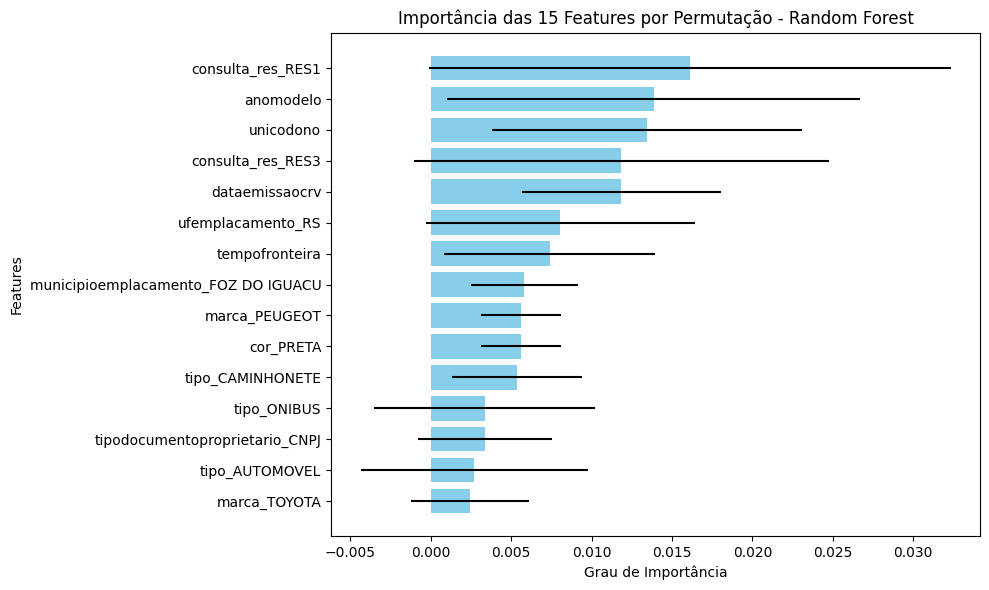

In [8]:
# Calcular a importância das features por permutação
perm_importance = permutation_importance(randomforest, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Obter as importâncias médias e o desvio padrão das importâncias
importance_vals = perm_importance.importances_mean
importance_std = perm_importance.importances_std
features = X_test.columns

# Ordenar as importâncias em ordem decrescente
indices = np.argsort(importance_vals)[::-1]

# Exibir apenas as 10 features mais importantes
top_n = 15
top_indices = indices[:top_n]

# Plotar a importância das 10 features mais importantes
plt.figure(figsize=(10, 6))
plt.title("Importância das 15 Features por Permutação - Random Forest")
plt.barh(range(top_n), importance_vals[top_indices], xerr=importance_std[top_indices], align="center", color='skyblue')
plt.yticks(range(top_n), features[top_indices])
plt.gca().invert_yaxis()  # Inverter o eixo Y para que a feature mais importante fique no topo
plt.xlabel('Grau de Importância')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



In [ ]:
# Importância das features - Permutação

perm_importance = permutation_importance(reglog, X_test, y_test, n_repeats=1, random_state=42, n_jobs=-1)
perm_importance.importances_mean.shape
feature_names = X_test.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Selecionar as 10 variáveis mais importantes
top_10_features = feature_importances.head(10)
# Selecionar as 10 variáveis menos importantes
bottom_10_features = feature_importances.tail(10)
#bottom_features = feature_importances.loc[feature_importances['Importance'] <= 0]

# Criar a figura e os subplots para os dois gráficos
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para as 10 variáveis mais importantes
ax[0].barh(top_10_features['Feature'], top_10_features['Importance'], color='green')
ax[0].set_title('Top 10 Most Important Features')
ax[0].set_xlabel('Importance')
ax[0].invert_yaxis()  # Inverter o eixo y para que a barra mais importante fique no topo

# Gráfico de barras para as 10 variáveis menos importantes
ax[1].barh(bottom_10_features['Feature'], bottom_10_features['Importance'], color='red')
ax[1].set_title('Top 10 Least Important Features')
ax[1].set_xlabel('Importance')
ax[1].invert_yaxis()  # Inverter o eixo y para que a barra menos importante fique no topo

# Ajustar layout para que os gráficos não se sobreponham
plt.tight_layout()

# Mostrar os gráficos
plt.show()
#"""

In [69]:
# Preprocessamento do X_train e X_test excluindo variáveis menos importantes.

#bottom_10_features
# 7. Criar um DataFrame com as importâncias
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean
})

important_features = importance_df[importance_df['Importance'] > 0]

#X_train_fil = X_train[important_features['Feature']]

#X_train.info()
X_train = X_train[important_features['Feature']]
X_test = X_test[important_features['Feature']]

ValueError: All arrays must be of the same length

In [ ]:
# Avaliação Padrão do RandomForest

importances = randomforest.feature_importances_

feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)

feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Selecionar as 10 variáveis mais importantes
top_10_features = feature_importances.head(30)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Inverter o eixo y para que a barra mais importante fique no topo
plt.show()

## Modelos - Redes Neurais Artificiais

In [39]:
# Importar bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
import numpy as np

# Função que cria o modelo de classificação
def create_model(input_shape):
    model = keras.Sequential()

    # Camada densa (fully connected) com 64 neurônios e função de ativação ReLU
    model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))

    # Camada densa com 32 neurônios
    model.add(layers.Dense(32, activation='relu'))

    # Camada de saída para classificação binária
    model.add(layers.Dense(1, activation='sigmoid'))  # Use 'softmax' para múltiplas classes

    # Compilar o modelo com otimizador Adam e função de perda binária
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Definir o número de folds para a validação cruzada
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Armazenar as acurácias de cada fold
accuracy_per_fold = []

# Converter X_train e y_train para NumPy arrays no formato adequado
X_train = np.array(X_train).astype('float32')  # Certifique-se que X_train seja float32
y_train = np.array(y_train).astype('int32')  # Se for binário, use int32; para múltiplas classes, use float32

# Realizar K-Fold Cross Validation
for train_index, test_index in kf.split(X_train):
    # Dividir os dados em conjunto de treino e validação
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Criar o modelo
    model = create_model(X_train.shape[1])

    # Treinar o modelo
    model.fit(X_train_fold, y_train_fold, epochs=1500, batch_size=32, verbose=0)

    # Avaliar o modelo no conjunto de validação
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracy_per_fold.append(scores[1])  # Acurácia está no índice 1 (posição da métrica)

# Mostrar o resultado de cada fold e a média das acurácias
print("Acurácia por fold:", accuracy_per_fold)
print("Acurácia média:", np.mean(accuracy_per_fold))


Acurácia por fold: [0.7738693356513977, 0.7537688612937927, 0.7777777910232544]
Acurácia média: 0.7684719959894816


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


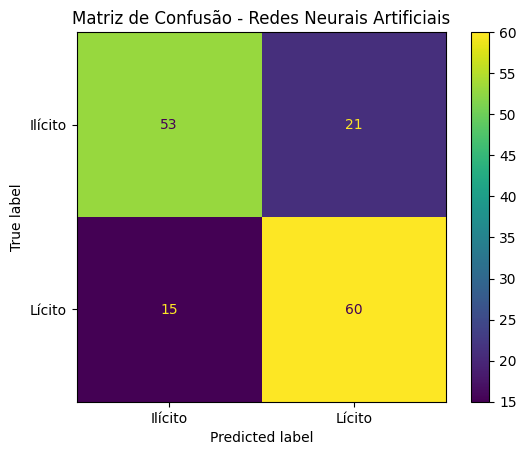

In [40]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Converter X_test e y_test para os tipos corretos
X_test = np.array(X_test).astype('float32')  # Garantir que seja float32
y_test = np.array(y_test).astype('int32')    # Ou use 'float32' se necessário

# Prever os valores de y_test com base em X_test
y_pred_proba = model.predict(X_test)  # Previsões de probabilidade

# Converter probabilidades em classes binárias (0 ou 1)
y_pred = (y_pred_proba > 0.5).astype('int32')

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão utilizando Scikit-learn
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ilícito', 'Lícito']).plot()

# Ajustar a visualização
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Matriz de Confusão - Redes Neurais Artificiais")
plt.show()



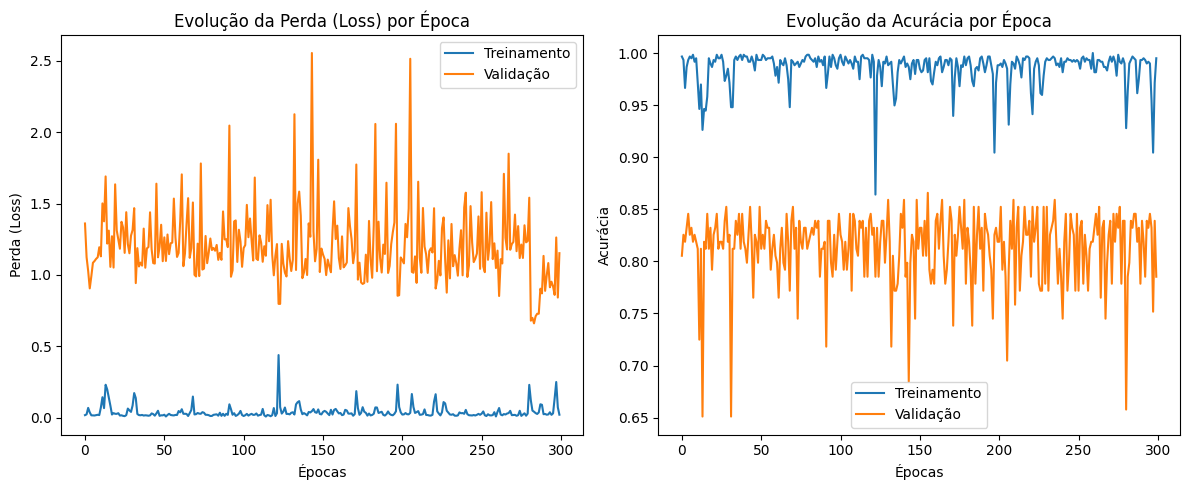

In [43]:
import matplotlib.pyplot as plt

# Ajustar o modelo e capturar o histórico de treinamento
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Gráfico da perda (loss) ao longo das épocas
plt.figure(figsize=(12, 5))

# Subplot para a perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Perda (Loss) por Época')
plt.xlabel('Épocas')
plt.ylabel('Perda (Loss)')
plt.legend()

# Subplot para a acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Evolução da Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Mostrar os gráficos
plt.tight_layout()
plt.show()


## Modelos - Pipeline - Treinamento e Avaliação

In [ ]:
reglog = LogisticRegression(max_iter=1000)

reglog_pipe = make_pipeline(col_transf, reglog)

#print(f"\033[1mCross-Validation - RegLog (Média): \033[0m {reglog_cv_result.mean()*100:.2f}%")
#print(f"\033[1mCross-Validation - RegLog (Desvio Padrão): \033[0m {reglog_cv_result.std()*100:.2f}%")
#print(f"\033[1mCross-Validation - RegLog (Resultados): \033[0m {reglog_cv_result}]]")

reglog_pipe_result = cross_val_score(reglog_pipe, X_train, y_train, cv=5, scoring='accuracy')
print(f"\033[1mCross-Validation - RegLog (Média): \033[0m {reglog_pipe_result.mean()*100:.2f}%")
print(f"\033[1mCross-Validation - RegLog (Desvio Padrão): \033[0m {reglog_pipe_result.std()*100:.2f}%")
print(f"\033[1mCross-Validation - RegLog (Resultados): \033[0m {reglog_pipe_result}]]")
reglog_pipe.fit(X_train, y_train)
reglog_pipe_pred = reglog_pipe.predict(X_test)

print("")
print(metrics.classification_report(y_test, reglog_pipe_pred))
print("")


# Resultados

In [61]:
# Gooogle Calc - Excel: 1vJ1UXufvWLjMfv7Xx-GGulEUdheWRPBZpMZ9hESVRoQ
# Google Cald - CSV: 1FhCL6wvWrdxV5p4EMbJB_Y-OyKf_1uEk

import gdown
import pandas as pd

# ID do arquivo Google Drive
file_id2 = '1FhCL6wvWrdxV5p4EMbJB_Y-OyKf_1uEk'
url2 = f'https://drive.google.com/uc?id={file_id2}'
output2 = 'arquivo2.csv'

# Baixa o arquivo
gdown.download(url2, output2, quiet=False)

import joblib
from google.colab import files
files.download('arquivo2.csv')

# Lê o arquivo Excel
dados = pd.read_csv(output2)
#dados = pd.read_excel(output2)

# Converte o DataFrame para o formato Markdown
markdown_table = dados.to_markdown(index=False)

# Exibe a tabela em formato Markdown
print("")
print("")
print(markdown_table)


Downloading...
From: https://drive.google.com/uc?id=1FhCL6wvWrdxV5p4EMbJB_Y-OyKf_1uEk
To: /content/arquivo2.csv
100%|██████████| 9.43k/9.43k [00:00<00:00, 15.1MB/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



| Algorítmo           | Colunas                                               | Modelo                                                                                                                                                                                                                                              | Normalização   | Otimização HP   | Permutação Exclusão Colunas   | CV Média   | CV Desvio Padrão   | Acuracy Score   | F1 Score Positivo   | F1 Score Negativo   |   VN |   VP |   FP |   FN |
|:--------------------|:------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------|:----------------|:------------------------------|:-----------|:-------------------|:----------------|:--------------------|:--------------

| Algorítmo           | Colunas                                               | Modelo                                                                                                                                                                                                                                              | Normalização   | Otimização HP   | Permutação Exclusão Colunas   | CV Média   | CV Desvio Padrão   | Acuracy Score   | F1 Score Positivo   | F1 Score Negativo   |   VN |   VP |   FP |   FN |
|:--------------------|:------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:---------------|:----------------|:------------------------------|:-----------|:-------------------|:----------------|:--------------------|:--------------------|-----:|-----:|-----:|-----:|
| Regressão Logística | Todas                                                 | reglog = LogisticRegression(max_iter=1000).fit(X_train, y_train)                                                                                                                                                                                    | Não            | Não             | Não                           | 79,03%     | 1,34%              | 81,88%          | 80,00%              | 83,00%              |   54 |   68 |   21 |    6 |
| Regressão Logística | Todas menos: unicodono                                | reglog = LogisticRegression(max_iter=1000).fit(X_train, y_train)                                                                                                                                                                                    | Não            | Não             | Não                           | 78,86%     | 1,10%              | 81,21%          | 79,00%              | 83,00%              |   53 |   68 |   22 |    6 |
| Regressão Logística | Todas menos: anomodelo e dataemissaocrv com unicodono | reglog = LogisticRegression(max_iter=1000).fit(X_train, y_train)                                                                                                                                                                                    | Não            | Não             | Não                           | 78,69%     | 1,21%              | 80,54%          | 79,00%              | 82,00%              |   53 |   67 |   22 |    7 |
| Regressão Logística | Todas                                                 | reglog = LogisticRegression(max_iter=1000).fit(X_train, y_train)                                                                                                                                                                                    | Sim            | Não             | Não                           | 80,03%     | 0,97%              | 85,91%          | 85,00%              | 87,00%              |   59 |   69 |   16 |    5 |
| Regressão Logística | Todas                                                 | reglog = LogisticRegression(max_iter=1000).fit(X_train, y_train)                                                                                                                                                                                    | Sim            | Não             | Não                           | 79,20%     | 1,14%              | 83,22%          | 81,00%              | 85,00%              |   55 |   69 |   20 |    5 |
|                     | dataemissaocrv (sem tratamento)                       |                                                                                                                                                                                                                                                     |                |                 |                               |            |                    |                 |                     |                     |      |      |      |      |
| Regressão Logística | Todas                                                 | reglog = LogisticRegression(max_iter=155, penalty="l2", solver="liblinear", C=25).fit(X_train, y_train)                                                                                                                                             | Não            | Sim             | Não                           | 80,54%     | 0,64%              | 85,91%          | 85,00%              | 87,00%              |   59 |   69 |   16 |    5 |
| Regressão Logística | Todas                                                 | reglog = LogisticRegression(max_iter=155, penalty="l2", solver="liblinear", C=25).fit(X_train, y_train)                                                                                                                                             | Não            | Sim             | Sim                           | 77,18%     | 1,70%              | 87,92%          | 87,00%              | 89,00%              |   58 |   73 |   17 |    1 |
| Regressão Logística | Todas                                                 | reglog = LogisticRegression(max_iter=155, penalty="l2", solver="liblinear", C=25).fit(X_train, y_train)                                                                                                                                             | Sim            | Sim             | Sim                           | 76,51%     | 0,91%              | 87,92%          | 87,00%              | 89,00%              |   58 |   73 |   17 |    1 |
| KNN                 | Todas                                                 | knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)                                                                                                                                                                                     | Não            | Não             | Não                           | 64,25%     | 4,01%              | 63,09%          | 66,00%              | 59,00%              |   54 |   40 |   21 |   34 |
| KNN                 | Todas menos: unicodono                                | knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)                                                                                                                                                                                     | Não            | Não             | Não                           | 64,59%     | 3,91%              | 63,76%          | 67,00%              | 60,00%              |   54 |   41 |   21 |   33 |
| KNN                 | Todas menos: anomodelo e dataemissaocrv com unicodono | knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)                                                                                                                                                                                     | Não            | Não             | Não                           | 67,28%     | 1,96%              | 67,79%          | 65,00%              | 70,00%              |   57 |   44 |   31 |   17 |
| KNN                 | Todas                                                 | knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)                                                                                                                                                                                     | Sim            | Não             | Não                           | 70,47%     | 2,67%              | 70,47%          | 70,00%              | 71,00%              |   52 |   53 |   22 |   21 |
| KNN                 | Todas menos: unicodono                                | knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)                                                                                                                                                                                     | Sim            | Não             | Não                           | 70,64%     | 1,63%              | 73,15%          | 73,00%              | 73,00%              |   54 |   55 |   21 |   19 |
| KNN                 | Todas menos: anomodelo e dataemissaocrv com unicodono | knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)                                                                                                                                                                                     | Sim            | Não             | Não                           | 68,12%     | 2,65%              | 68,46%          | 66,00%              | 71,00%              |   45 |   57 |   30 |   17 |
| KNN                 | Todas menos: unicodono                                | knn = KNeighborsClassifier(n_neighbors=7, p=7, metric="manhattan", weights="distance").fit(X_train, y_train)                                                                                                                                        | Sim            | Sim             | Não                           | 71,14%     | 0,69%              | 77,85%          | 74,00%              | 81,00%              |   46 |   70 |   29 |    4 |
| KNN                 | Todas                                                 | knn = KNeighborsClassifier(n_neighbors=7, p=7, metric="manhattan", weights="distance").fit(X_train, y_train)                                                                                                                                        | Sim            | Sim             | Sim                           | 78,52%     | 1,04%              | 81,21%          | 78,00%              | 83,00%              |   51 |   70 |   24 |    4 |
| Árvore de Decisão   | Todas                                                 | decisiontree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)                                                                                                                                                                            | Não            | Não             | Não                           | 77,18%     | 1,03%              | 71,14%          | 64,00%              | 76,00%              |   39 |   67 |   36 |    7 |
| Árvore de Decisão   | Todas menos: unicodono                                | decisiontree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)                                                                                                                                                                            | Não            | Não             | Não                           | 76,51%     | 1,45%              | 71,14%          | 64,00%              | 76,00%              |   39 |   67 |   36 |    7 |
| Árvore de Decisão   | Todas menos: anomodelo e dataemissaocrv com unicodono | decisiontree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)                                                                                                                                                                            | Não            | Não             | Não                           | 78,02%     | 1,22%              | 71,14%          | 64,00%              | 76,00%              |   39 |   67 |   36 |    7 |
| Árvore de Decisão   | Todas                                                 | decisiontree = DecisionTreeClassifier(max_depth=24, criterion="gini", min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)                                                                                                                | Não            | Sim             | Não                           | 82,05%     | 0,97%              | 81,22%          | 79,00%              | 83,00%              |   54 |   67 |   21 |    7 |
| Árvore de Decisão   | Todas menos: unicodono                                | decisiontree = DecisionTreeClassifier(max_depth=24, criterion="gini", min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)                                                                                                                | Não            | Sim             | Não                           | 82,04%     | 1,74%              | 79,87%          | 78,00%              | 81,00%              |   53 |   66 |   22 |    8 |
| Árvore de Decisão   | Todas menos: anomodelo e dataemissaocrv com unicodono | decisiontree = DecisionTreeClassifier(max_depth=24, criterion="gini", min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)                                                                                                                | Não            | Sim             | Não                           | 78,69%     | 1,71%              | 81,88%          | 79,00%              | 84,00%              |   51 |   71 |   24 |    3 |
| Árvore de Decisão   | Todas                                                 | decisiontree = DecisionTreeClassifier(max_depth=24, criterion="gini", min_samples_leaf=1, min_samples_split=2).fit(X_train, y_train)                                                                                                                | Não            | Sim             | Sim                           | 77,68%     | 3,04%              | 79,19%          | 77,00%              | 81,00%              |   53 |   65 |   22 |    9 |
| RandomForest        | Todas                                                 | randomforest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=100).fit(X_train, y_train)                                                                                                                                        | Não            | Não             | Não                           | 80,20%     | 1,57%              | 76,51%          | 74,00%              | 79,00%              |   50 |   64 |   25 |   10 |
| RandomForest        | Todas menos: unicodono                                | randomforest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=100).fit(X_train, y_train)                                                                                                                                        | Não            | Não             | Não                           | 78,02%     | 1,85%              | 74,50%          | 74,00%              | 75,00%              |   53 |   58 |   22 |   16 |
| RandomForest        | Todas menos: anomodelo e dataemissaocrv com unicodono | randomforest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=100).fit(X_train, y_train)                                                                                                                                        | Não            | Não             | Não                           | 77,18%     | 1,21%              | 74,50%          | 72,00%              | 77,00%              |   48 |   63 |   27 |   11 |
| RandomForest        | Todas                                                 | randomforest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=100).fit(X_train, y_train)                                                                                                                                        | Sim            | Não             | Não                           | 80.20%     | 1,57%              | 76,51%          | 74,00%              | 79,00%              |   50 |   64 |   25 |   10 |
| RandomForest        | Todas                                                 | randomforest = RandomForestClassifier(n_estimators=150, bootstrap=False, max_depth=40, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=100).fit(X_train, y_train)                                                        | Não            | Sim             | Não                           | 82,38%     | 0,41%              | 86,58%          | 86,00%              | 88,00%              |   59 |   70 |   16 |    4 |
| RandomForest        | Todas                                                 | randomforest = RandomForestClassifier(n_estimators=900, bootstrap=False, max_depth=120, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=100).fit(X_train, y_train)                                                       | Não            | Sim             | Não                           | 82,72%     | 0,93%              | 86,58%          | 86,00%              | 87,00%              |   62 |   67 |   13 |    7 |
| RandomForest        | Todas                                                 | randomforest = RandomForestClassifier(n_estimators=150, bootstrap=False, max_depth=40, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=100).fit(X_train, y_train)                                                        | Não            | Sim             | Sim                           | 79,86%     | 1,82%              | 87,25%          | 87,00%              | 88,00%              |   61 |   69 |   14 |    5 |
| RandomForest        | Todas                                                 | randomforest = RandomForestClassifier(n_estimators=900, bootstrap=False, max_depth=120, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=100).fit(X_train, y_train)                                                       | Não            | Sim             | Sim                           | 80,70%     | 4,65%              | 87,92%          | 87,00%              | 89,00%              |   61 |   70 |   14 |    4 |
| SVM                 | Todas                                                 | svm = SVC(probability=True).fit(X_train, y_train)                                                                                                                                                                                                   | Não            | Não             | Não                           | 50,67%     | 1,31%              | 55,34%          | 66,00%              | 5,00%               |   73 |    2 |    2 |   72 |
| SVM                 | Todas                                                 | svm = SVC(probability=True, C=1, degree=1, gamma="scale", kernel="linear", class_weight='balanced').fit(X_train, y_train)                                                                                                                           | Não            | Sim             | Não                           | 78,02%     | 1,69%              | 78,52%          | 76,00%              | 81,00%              |   50 |   67 |   25 |    7 |
| SVM                 | Todas                                                 | svm = SVC(probability=True, C=1, degree=1, gamma="scale", kernel="linear", class_weight='balanced').fit(X_train, y_train)                                                                                                                           | Não            | Sim             | Sim                           | 79,03%     | 2,47%              | 77,18%          | 73,00%              | 80,00%              |   46 |   69 |   29 |    5 |
| Votting             | Todas                                                 | votting = VotingClassifier(estimators=[('rf', randomforest),('dtree', decisiontree),('knn', knn),('lr', reglog)],voting='soft').fit(X_train, y_train)                                                                                               | Não            | Não             | Não                           | 84,56%     | 2,14%              | 80,54%          | 78,00%              | 82,00%              |   52 |   68 |   22 |    6 |
| Votting             | Todas                                                 | votting = VotingClassifier(estimators=[('rf', randomforest),('dtree', decisiontree),('knn', knn),('lr', reglog)],voting='hard').fit(X_train, y_train)                                                                                               | Não            | Sim             | Sim                           | 82,71      | 2,15%              | 84,56%          | 83,00%              | 86,00%              |   57 |   69 |   18 |    5 |
| Votting             | Todas                                                 | votting = VotingClassifier(estimators=[('rf', randomforest),('knn', knn),('lr', reglog)],voting='hard').fit(X_train, y_train)                                                                                                                       | Não            | Sim             | Não                           | 83,22      | 1,69%              | 85,23%          | 84,00%              | 86,00%              |   59 |   68 |   16 |    6 |
| XGBoost             | Todas                                                 | xgboost = XGBClassifier(objective='multi:softmax', num_class=2, random_state=42).fit(X_train, y_train)                                                                                                                                              | Não            | Não             | Não                           | 82,04%     | 1,74%              | 82,55%          | 81,00%              | 84,00%              |   55 |   68 |   20 |    6 |
| XGBoost             | Todas menos: anomodelo e dataemissaocrv com unicodono | xgboost = XGBClassifier(objective='multi:softmax', num_class=2, random_state=42).fit(X_train, y_train)                                                                                                                                              | Não            | Não             | Não                           | 78,35%     | 0,46%              | 83,22%          | 81,00%              | 85,00%              |   54 |   70 |   21 |    4 |
| XGBoost             | Todas                                                 | xgboost = XGBClassifier(objective='multi:softmax', num_class=2, random_state=42).fit(X_train, y_train)                                                                                                                                              | Sim            | Não             | Não                           | 82,04%     | 1,74%              | 82,55%          | 81,00%              | 84,00%              |   55 |   68 |   20 |    6 |
| XGBoost             | Todas                                                 | xgboost = XGBClassifier(objective='multi:softmax',num_class=2,random_state=100,alpha=0,colsample_bytree=1,eta=0.01,gamma=0, reg_lambda=0.1,max_depth=7,min_child_weight=1,learning_rate=0.2, n_estimatores=155,subsample=0.7).fit(X_train, y_train) | Não            | Sim             | Não                           | 81,54%     | 2.55%              | 83,22%          | 82,00%              | 84,00%              |   56 |   68 |   19 |    6 |
| XGBoost             | Todas                                                 | xgboost = XGBClassifier(objective='multi:softmax',num_class=2,random_state=100,alpha=0,colsample_bytree=1,eta=0.01,gamma=0, reg_lambda=0.1,max_depth=7,min_child_weight=1,learning_rate=0.2, n_estimatores=155,subsample=0.7).fit(X_train, y_train) | Não            | Sim             | Sim                           | 80,53%     | 2,39               | 83,89%          | 82,00%              | 85,00%              |   55 |   70 |   20 |    4 |
| Stacking            | Todas                                                 | base_learners = [                                                                                                                                                                                                                                   | Não            | Não             | Não                           | 82,05%     | 1,34%              | 85,91%          | 85,00%              | 87,00%              |   59 |   69 |   16 |    5 |
|                     |                                                       |     ('rf', randomforest),                                                                                                                                                                                                                           |                |                 |                               |            |                    |                 |                     |                     |      |      |      |      |
|                     |                                                       |     ('knnc', knn),                                                                                                                                                                                                                                  |                |                 |                               |            |                    |                 |                     |                     |      |      |      |      |
|                     |                                                       |     ('decisiontree', decisiontree),                                                                                                                                                                                                                 |                |                 |                               |            |                    |                 |                     |                     |      |      |      |      |
|                     |                                                       |     ('lr', reglog)                                                                                                                                                                                                                                  |                |                 |                               |            |                    |                 |                     |                     |      |      |      |      |
|                     |                                                       | ]                                                                                                                                                                                                                                                   |                |                 |                               |            |                    |                 |                     |                     |      |      |      |      |